
# 基于 pyqcat-monster 的coupler表征流程

在本教程中，我们将演示如何使用 pyqcat-monster 进行单比特表征流程测试。在这里你可以了解到：

- 基于 monster 的单比特表征流程测试；
- 基于 montser 的相关 API 使用方式；

在此基础上，我们还提供了 [monster]() 的 API 文档，期待您的阅读。当您发现有错误或者需要优化的地方，欢迎您通过 [pyqcat社区](https://document.qpanda.cn/space/9030MdOBwNfe5oqw) 向我们反馈，您的意见是我们不断进步的动力！

## 创建实验环境

- 若您未安装 pyqcat 包（monster），通过本地源码测试，需要执行下面操作，将 monster 项目环境加载到 jupyter 中；
- 若安装了 pyqcat 包（monster），跳过此步骤

In [1]:
# import sys

# package_root = "../../pyqcat-monster"
# sys.path.insert(0, package_root)

### 导入依赖包

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pyQCat.tools import qarange
from pyQCat.context import ExperimentContext
from pyQCat.invoker import Invoker
from pyQCat.parameters import get_parameters, transform_coupler_to_qubits
from pyQCat.types import Quality
from pyQCat.log import pyqlog
from pyQCat.experiments import *
from pyQCat.qubit import Qubit
from pyQCat.analysis.fit.fit_models import freq2amp_formula, amp2freq_formula


# from pyQCat.experiments.composite.qubit_freq_calibration import CouplerFreqCalibration

%matplotlib notebook
pd.set_option('max_colwidth', None)

### 用户信息配置

In [2]:
conf_file = r'F:\MonsterTest_QT8013\conf\config.conf'

username = "wangpeng"
password = "8013"


# Invoker.verify_account(username=username, password=password)
Invoker.load_account()

{'code': 200,
 'data': {'username': 'wangpeng',
  'groups': 'normal',
  'email': 'pwang0110@mail.ustc.edu.cn',
  'phone_num': None,
  'is_super': False,
  'is_admin': False,
  'status': 0,
  'create_time': '2022-11-11 16:58:11',
  'last_login_time': '2022-12-09 11:43:34',
  'id': '636e0ea3eac949e7d31db591'},
 'msg': 'success'}

In [3]:
context = ExperimentContext(conf_file)

2022-12-09 16:17:03 |   INFO   | Monster Log save in E:\Data\D121107\monster-2022-12-09.log
2022-12-09 16:17:03 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |           coupler_freestyle            |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|



### 检索系统配置信息

In [4]:
pd.DataFrame(context.config_table())

parameter  module                                      value
0          sample  system  220826-72bit-300pin-V8.2-Base-24#_monster
1        env_name  system                             D1_env(QT8013)
2     point_label  system                                  freestyle
3    invoker_addr  system                 tcp://192.168.110.211:8088
4   baseband_freq  system                                    566.667
5       qaio_type  system                                         30
6       save_type  system                                      local
7      local_root  system                        E:\Data\D1\20221107
8        log_path  system                           E:\Data\D121107
9     config_path  system                 F:\MonsterTest_QT8013\conf
10      inst_host   mongo                            192.168.110.211
11      inst_port   mongo                                      27017
12        s3_root   minio                           10.10.24.76:9000
13  s3_access_key   minio                                      super
14  s3_secret_key   minio                                   80138013
15         cpci_1     qdc                              192.168.2.100
16         cpci_2     qdc                              192.168.2.101
17         cpci_3     qdc                              192.168.2.102
18         cpci_4     qdc                              192.168.2.103
19         cpci_5     qdc                              192.168.2.104

### 实验参数配置

In [1]:
coupler_name = "c7071"
ENV_BIT = ["q64", "q65", "q69", "q70", "q71","q72", "c6470", "c6571", "c6970", "c7071","c7172"]

parking_bits = ['q71']
parking_zamp = [0]

In [9]:
# with open("E:/Data/D1/20221107/work_pint.json","r") as f:
#     work_pint = json.load(f)
# print(work_pint)
# for bit in ENV_BIT:
#     if bit[0] is 'q':
#         q = get_parameters('qubit',bit)
#         q.dc_max = work_pint[bit][0]
#         q.dc_min = work_pint[bit][1]
#         q.save_data()
#     elif bit[0] is 'c':
#         q = get_parameters('coupler',bit)
#         q.dc_max = work_pint[bit][0]
#         q.dc_min = work_pint[bit][1]
#         q.save_data()

{'q69': [-0.026, 0.117], 'q70': [-0.063, 0.082], 'q71': [-0.057, 0.095], 'q72': [-0.03, 0.109], 'q64': [-0.056, 0.094], 'q65': [-0.063, 0.083], 'c6470': [-0.133, 0.092], 'c6571': [-0.125, 0.0], 'c6970': [0.089, -0.08], 'c7071': [0.108, -0.045], 'c7172': [0.087, -0.058]}
2022-12-09 16:19:36 |  UPDATE  | Save q64 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save q65 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save q69 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save q70 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save q71 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save q72 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save c6470 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save c6571 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save c6970 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save c7071 to data service success.
2022-12-09 16:19:36 |  UPDATE  | Save c7172 to data

## 校准probe qubit

### 环境创建

In [28]:
context.coupler

In [64]:
context.configure_inst()
coupler = context.configure_coupler_probe_qubit_cali_infos(coupler_name)

new_env_bit = []
for bit in ENV_BIT:
    base_bit = context.get_base_qubit(bit)
    if isinstance(base_bit, Qubit) and base_bit.bit != context.qubit.bit:
        base_bit.ac = base_bit.dc_min
    elif base_bit.bit != coupler.bit:
        base_bit.ac = base_bit.dc_max
    else:
        base_bit.ac = base_bit.dc_max + 0.01
    new_env_bit.append(base_bit)


# 开启使用全局 AC 功能
context.maximize_compensate()

context.configure_environment(new_env_bit)
context.configure_crosstalk_dict()

# probe比特流程待表振的比特
qubit = context.qubit

2022-12-01 12:07:48 |   INFO   | transform c7071 to drive q72 | probe q70
2022-12-01 12:07:48 | WARNING  | Qubit(bit=70) is already exist in current environment.


In [10]:
def single_probe_qubit_cali_context(
    coupler_name: str,
    parking_bits: list,
    parking_zamp: list,
    env_bit: list,
    use_dcm: bool = False,
    ac_switch: bool = True
):
    """ 应用场景：
        - 单比特表征所有流程
    """
    context = ExperimentContext(conf_file)
    context.configure_inst()

    coupler = context.configure_coupler_probe_qubit_cali_infos(coupler_name)
    
    
    new_env_bit = []
    for bit in env_bit:
        base_bit = context.get_base_qubit(bit)
        if base_bit.name in [coupler_name, context.qubit.name]:
            base_bit.ac = base_bit.dc_max
        elif base_bit.name in parking_bits:
            base_bit.ac = base_bit.dc_max + parking_zamp[parking_bits.index(base_bit.name)]
        elif isinstance(base_bit, Qubit):
            base_bit.ac = base_bit.dc_min
        else:
            base_bit.ac = base_bit.dc_max
        new_env_bit.append(base_bit)
    

    if ac_switch:
        context.maximize_compensate()
    else:
        context.minimize_compensate()
    context.configure_environment(new_env_bit)
    context.configure_crosstalk_dict()

    if use_dcm:
        context.configure_dcm(qubit_name)

    return context,coupler

In [11]:
context,coupler = single_probe_qubit_cali_context(coupler_name, parking_bits, parking_zamp, ENV_BIT, use_dcm=False, ac_switch=True)
qubit = context.qubit


2022-12-09 16:19:45 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |           coupler_freestyle            |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|

2022-12-09 16:19:45 |   INFO   | transform c7071 to drive q71 | probe q70
2022-12-09 16:19:46 | WARNING  | Qubit(bit=70) is already exist in current environment.


#### 检索实验环境配置参数

In [36]:
pd.DataFrame(context.context_table())

parameter  \
0          config   
1          qubits   
2        couplers   
3  discriminators   
4     compensates   
5      working_dc   
6  crosstalk_dict   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                object  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               F:\MonsterTest_QT8013\conf\config.conf   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [Qubit(bit=70)]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   []   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 None   
4  {Qubit(bit=64): PulseCorrectionQ64, Qubit(bit=65): PulseCorrectionQ65, Qubit(bit=69): PulseCorrectionQ69, Qubit(bit=70): PulseCorrectionQ70, Qubit(bit=71): PulseCorrectionQ71, Qubit(bit=72): PulseCorrectionQ72, Coupler(bit=6470, driveQ64, probeQ70): PulseCorrectionC6470, Coupler(bit=6571, driveQ65, probeQ71): PulseCorrectionC6571, Coupler(bit=6970, driveQ69, probeQ70): PulseCorrectionC6970, Coupler(bit=7071, driveQ71, probeQ70): PulseCorrectionC7071, Coupler(bit=7172, driveQ71, probeQ72): PulseCorrectionC7172}   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 True   
6                                                                                                                                                                                        

#### 检索probe初始比特参数信息

In [9]:
pd.DataFrame(context.base_qubit_table(context.qubit))

parameter  \
0                       tunable   
1                      goodness   
2                    drive_freq   
3                   drive_power   
4                    probe_freq   
5                   probe_power   
6                      tls_freq   
7                 anharmonicity   
8                            dc   
9                        dc_max   
10                       dc_min   
11                           ac   
12                           T1   
13                           T2   
14               z_flux_channel   
15                 z_dc_channel   
16                   idle_point   
17                  ac_spectrum   
18          readout_point_model   
19                readout_point   
20                   xy_channel   
21              readout_channel   
22                 sample_delay   
23                 sample_width   
24                   XYwave.Xpi   
25                  XYwave.Xpi2   
26                   XYwave.Ypi   
27                  XYwave.Ypi2   
28                   XYwave.Zpi   
29         XYwave.baseband_freq   
30                 XYwave.delta   
31             XYwave.detune_pi   
32            XYwave.detune_pi2   
33                 XYwave.alpha   
34                XYwave.offset   
35                  XYwave.time   
36                  Mwave.width   
37                    Mwave.amp   
38          Mwave.baseband_freq   
39          union_readout.width   
40            union_readout.amp   
41          union_readout.index   
42  union_readout.baseband_freq   
43                  f12_options   

                                                                                                                                                                            value  \
0                                                                                                                                                                            True   
1                                                                                                                                                                           False   
2                                                                                                                                                                        4796.607   
3                                                                                                                                                                             -35   
4                                                                                                                                                                        7126.441   
5                                                                                                                                                                           -30.0   
6                                                                                                                                                                            None   
7                                                                                                                                                                            -240   
8                                                                                                                                                                          -0.278   
9                                                                                                                                                                          -0.063   
10                                                                                                                                                                           0.08   
11                                                                                                                                                                         -0.063   
12                                                                                           

#### 检索 DC(AC) 配置信息

In [1]:
pd.DataFrame(context.work_dc_table())

NameError: name 'pd' is not defined

In [13]:
context.qubit

Qubit(bit=70)

In [13]:
pd.DataFrame(context.work_ac_table())

qubit  z_flux_channel    value  \
0                           Qubit(bit=64)              14   0.094v   
1                           Qubit(bit=65)               9   0.083v   
2                           Qubit(bit=69)              22   0.117v   
3                           Qubit(bit=70)              21  -0.063v   
4                           Qubit(bit=71)              18  -0.057v   
5                           Qubit(bit=72)              13   0.109v   
6   Coupler(bit=6470, driveQ64, probeQ70)              23  -0.133v   
7   Coupler(bit=6571, driveQ65, probeQ71)              16  -0.125v   
8   Coupler(bit=6970, driveQ69, probeQ70)              24   0.089v   
9   Coupler(bit=7071, driveQ71, probeQ70)              19   0.108v   
10  Coupler(bit=7172, driveQ71, probeQ72)              20   0.087v   

      m_pulse_model                          m_pulse_params  \
0   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
1   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
2   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
3   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
4   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
5   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
6   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
7   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
8   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
9   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
10  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   

              compensate  
0     PulseCorrectionQ64  
1     PulseCorrectionQ65  
2     PulseCorrectionQ69  
3     PulseCorrectionQ70  
4     PulseCorrectionQ71  
5     PulseCorrectionQ72  
6   PulseCorrectionC6470  
7   PulseCorrectionC6571  
8   PulseCorrectionC6970  
9   PulseCorrectionC7071  
10  PulseCorrectionC7172

#### 检索线路补偿器信息

In [16]:
pd.DataFrame(context.compensates_table())

name  x_delay  z_delay  z_compensate  distortion_width  \
0     q64      0.0    0.000           0.0               0.0   
1     q65      0.0    0.000           0.0               0.0   
2     q69      0.0    0.000           0.0               0.0   
3     q70      0.0   30.000           0.0            4405.0   
4     q71      0.0   28.750           0.0            7605.0   
5     q72      0.0    0.000           0.0               0.0   
6   c6470      0.0    0.000           0.0               0.0   
7   c6571      0.0    0.000           0.0               0.0   
8   c6970      0.0    0.000           0.0               0.0   
9   c7071      0.0   35.625           0.0            9905.0   
10  c7172      0.0    0.000           0.0               0.0   

    distortion_data_len distortion_ab distortion_type  
0                     0            []           width  
1                     0            []           width  
2                     0            []           width  
3                   157            []           width  
4                 12169            []           width  
5                     0            []           width  
6                     0            []           width  
7                     0            []           width  
8                     0            []           width  
9                 15849            []           width  
10                    0            []           width

### CavitySpecturm

Tunbale实验用于获取比特腔调制谱，简并点电压及读取频率

#### 驱动线不加波形的能谱粗测

2022-12-09 16:21:26 |   EXP    | CavityFreqSpectrum register success, id 6392f006547fe93c497787b9
2022-12-09 16:21:26 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CavityFreqSpectrum\q70\2022-12-09\16.21.26\


<IPython.core.display.Javascript object>


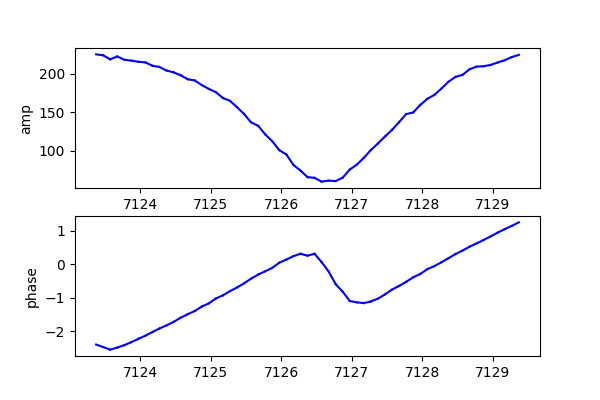

  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-09 16:22:26 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality      | 
---------------------------------------------------------
|  fr  |    fc    | 7126.635 | MHz  | R²=0.999(perfect) | 


In [17]:
cs_exp = CavityFreqSpectrum.from_experiment_context(context)

cs_exp.set_experiment_options(
    ac_prepare_time=8000,
    add_pi_pulse=False,
#     simulator_data_path='../scripts/simulator/data/CavityFreqSpectrum/',
    readout_power=-40,
)

cs_exp.set_analysis_options(
    is_plot=True,
    quality_bounds=[0.98, 0.95, 0.85]
)

cs_exp.run()

#### 查看实验结果图

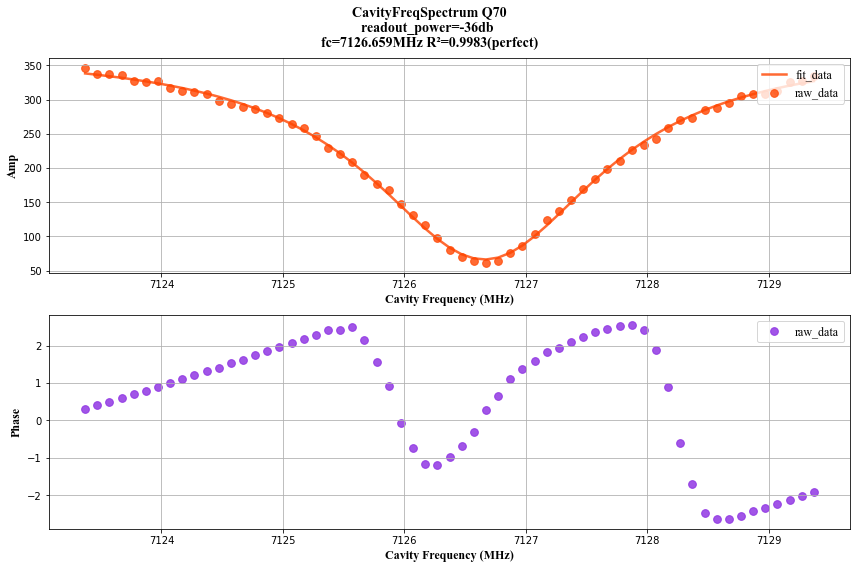

In [41]:
cs_exp.analysis.drawer.figure

#### 判断结果质量并更新数据库

In [18]:
if cs_exp.analysis.quality.descriptor in [Quality.perfect, Quality.normal]:
    qubit.probe_freq = cs_exp.analysis.results.fr.value
    qubit.probe_power = cs_exp.experiment_options.readout_power
    coupler.probe_freq = cs_exp.analysis.results.fr.value
    coupler.probe_power = cs_exp.experiment_options.readout_power
    pyqlog.info(f'Update {qubit} probe_freq {qubit.probe_freq}MHz, probe_power {qubit.probe_power}db')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-09 16:22:33 |   INFO   | Update Qubit(bit=70) probe_freq 7126.635MHz, probe_power -40db
2022-12-09 16:22:33 |  UPDATE  | Save c7071 to data service success.


In [20]:
coupler

### QubitSpecturm

#### 比特能谱细扫实验

2022-12-09 16:22:43 |   EXP    | QubitSpectrum register success, id 6392f053547fe93c497787bb
2022-12-09 16:22:43 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\QubitSpectrum\q70\2022-12-09\16.22.43\


<IPython.core.display.Javascript object>


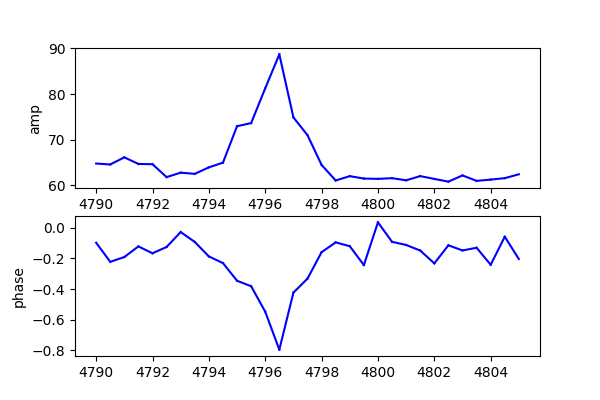

  0%|          | 0/31 [00:00<?, ?it/s]

2022-12-09 16:23:05 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality       | 
----------------------------------------------------------
| freq |   f01    | 4796.341 | MHz  | R²=0.9165(perfect) | 


In [19]:
qs_exp = QubitSpectrum.from_experiment_context(context)

qs_exp.set_experiment_options(
    ac_prepare_time=1000,
    freq_list=qarange(4790, 4805, 0.5),
    drive_power=-40,
    z_amp=None,
    use_square=True,
    band_width=10,
    fine_flag=True,
#     simulator_data_path='../scripts/simulator/data/QubitSpectrum/5000Mhz/fine/'
)

qs_exp.set_analysis_options(
    snr_bounds=1.5,
    quality_bounds=[0.8, 0.6, 0.5],
    is_plot=True,
)

qs_exp.run()

#### 查看实验结果

In [48]:
pd.DataFrame(qs_exp.analysis.show_results())

name     value unit extra             quality
0  f01  4796.049  MHz    {}  R²=0.9515(perfect)

#### 查看实验结果图

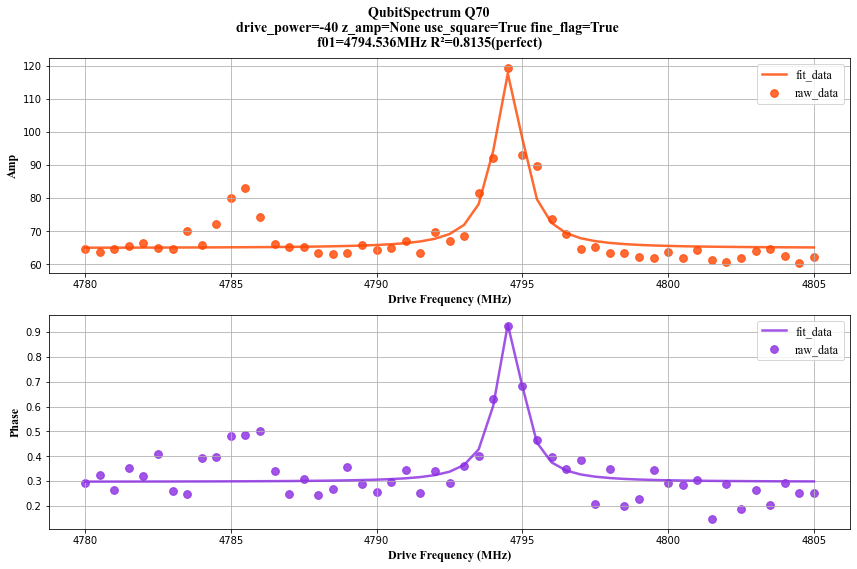

In [180]:
qs_exp.analysis.drawer.figure

In [20]:
qs_exp.analysis.results.freq.value

4796.341

### RabiScanWidth

扫描 `Drag` 的脉冲宽度，通过其振荡规律判断比特频率是否正确

2022-12-09 16:24:16 |   EXP    | RabiScanWidth register success, id 6392f0b0547fe93c49778837
2022-12-09 16:24:16 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\RabiScanWidth\q70\2022-12-09\16.24.09\


<IPython.core.display.Javascript object>


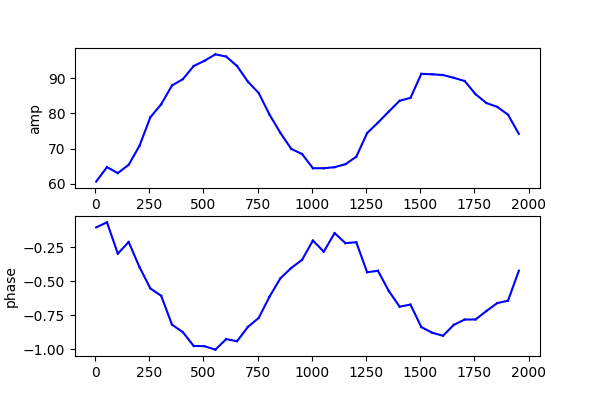

  0%|          | 0/40 [00:00<?, ?it/s]

'scipy.optimize.curve_fit failed with error: `x0` is infeasible.'
'scipy.optimize.curve_fit failed with error: `x0` is infeasible.'
'scipy.optimize.curve_fit failed with error: `x0` is infeasible.'
'scipy.optimize.curve_fit failed with error: `x0` is infeasible.'
2022-12-09 16:24:55 |  RESULT  | Experiment results as follow:
|    name     |  describe   | value | unit |      quality       | 
-----------------------------------------------------------------
| oscillating | oscillating | True  | None | R²=0.9848(perfect) | 


In [22]:
rsw = RabiScanWidth.from_experiment_context(context)

rsw.set_experiment_options(
    ac_prepare_time=8000,
    drive_freq=4796.341,
    drive_power=-30,
    widths = qarange(5, 2000, 50),
#     simulator_data_path='../scripts/simulator/data/RabiScanWidth'
)

rsw.run()

#### 查看实验结果

In [53]:
pd.DataFrame(rsw.analysis.show_results())

name  value  unit extra             quality
0  oscillating   True  None    {}  R²=0.9952(perfect)

#### 查看实验结果图

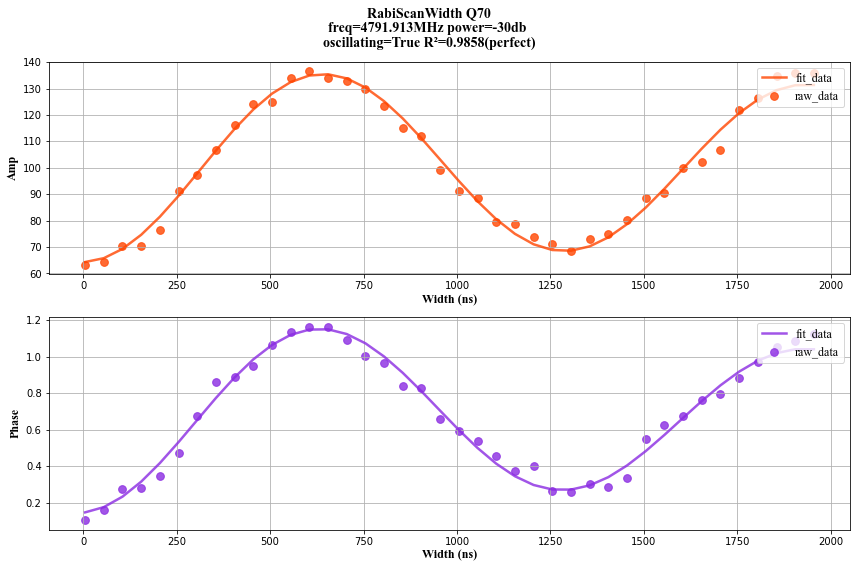

In [17]:
rsw.analysis.drawer.figure

#### 根据能谱和 RabiWidth 判断是否更新比特频率

In [23]:
qs_quality = qs_exp.analysis.quality.descriptor
oscillating = rsw.analysis.results.oscillating.value

if qs_quality in [Quality.perfect, Quality.normal] and oscillating:
    qubit.drive_freq = qs_exp.analysis.results.freq.value
    qubit.drive_power = qs_exp.experiment_options.drive_power
    coupler.probe_drive_freq = qs_exp.analysis.results.freq.value
    pyqlog.info(f'Update {coupler} probe_drive_freq {qubit.drive_freq}MHz, drive_power {qubit.drive_power}db')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-09 16:24:59 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) probe_drive_freq 4796.341MHz, drive_power -40db
2022-12-09 16:24:59 |  UPDATE  | Save c7071 to data service success.


In [57]:
f01 = 4796.436
qubit.drive_freq = f01
coupler.probe_drive_freq = f01

### XpiDetection

XpiDetune 实验是对 RabiScanAmp 实验的封装， 扫描 `Drag` 幅值，粗测 `X` 门幅值

#### 更新probe比特的pi pulse时间

In [24]:
pi_pulse_time = 980
coupler.probe_XYwave.time = pi_pulse_time
qubit.XYwave.time = pi_pulse_time
coupler.save_data()


2022-12-09 16:25:12 |  UPDATE  | Save c7071 to data service success.


2022-12-09 16:41:03 |   EXP    | The expect_value is 0.7.
2022-12-09 16:41:03 |   EXP    | The max test time is 5.
2022-12-09 16:41:03 |   EXP    | RabiScanAmp count 0, drive_power -35
2022-12-09 16:41:12 |   EXP    | RabiScanAmp register success, id 6392f4a8547fe93c49778c2f
2022-12-09 16:41:12 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\XpiDetection\q70\2022-12-09\16.41.03\RabiScanAmp\16-41-03-count=0-drive_power=-35\


<IPython.core.display.Javascript object>


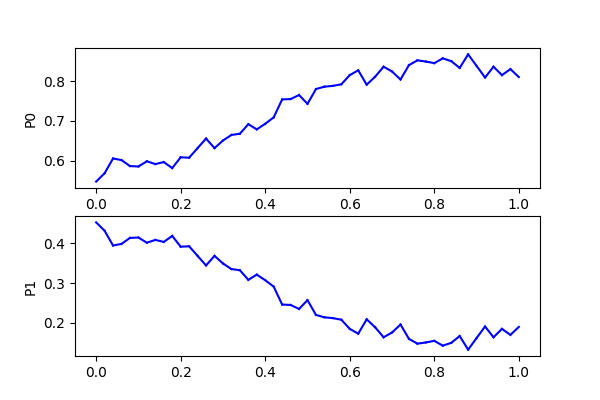

  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-09 16:42:47 |  RESULT  | Experiment results as follow:
|    name     | describe | value | unit |      quality      | 
-------------------------------------------------------------
| drive_power |    dp    |  -35  |  db  | R²=0.9797(normal) | 
|     Xpi     |  X-amp   | 0.82  |  V   | R²=0.9797(normal) | 
2022-12-09 16:42:47 |   EXP    | RabiScanAmp count 1, drive_power -33.6
2022-12-09 16:42:56 |   EXP    | RabiScanAmp register success, id 6392f510547fe93c49778c8b
2022-12-09 16:42:56 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\XpiDetection\q70\2022-12-09\16.41.03\RabiScanAmp\16-42-47-count=1-drive_power=-33.6\


<IPython.core.display.Javascript object>


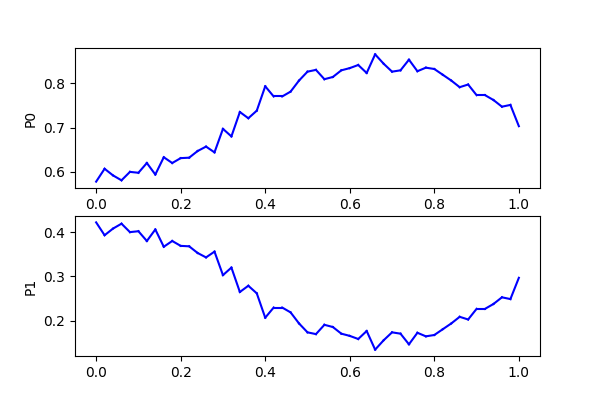

  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-09 16:44:14 |  RESULT  | Experiment results as follow:
|    name     | describe | value | unit |      quality      | 
-------------------------------------------------------------
| drive_power |    dp    | -33.6 |  db  | R²=0.9769(normal) | 
|     Xpi     |  X-amp   | 0.68  |  V   | R²=0.9769(normal) | 
2022-12-09 16:44:14 |  RESULT  | Success, Xpi 0.68, drive_power -33.6


In [45]:
xd = XpiDetection.from_experiment_context(context)

xd.set_experiment_options(
    amps=qarange(0, 1, 0.02),
    drive_power=-35,
    name="Xpi",
#     simulator_data_path='../scripts/simulator/data/XpiDetection/'
)

xd.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
)

xd.run()

#### 查看实验结果

In [57]:
pd.DataFrame(xd.analysis.show_results())

name  value unit extra             quality
0     dp -35.00   db    {}  R²=0.9873(perfect)
1  X-amp   0.78    V    {}  R²=0.9873(perfect)

#### 查看实验结果图

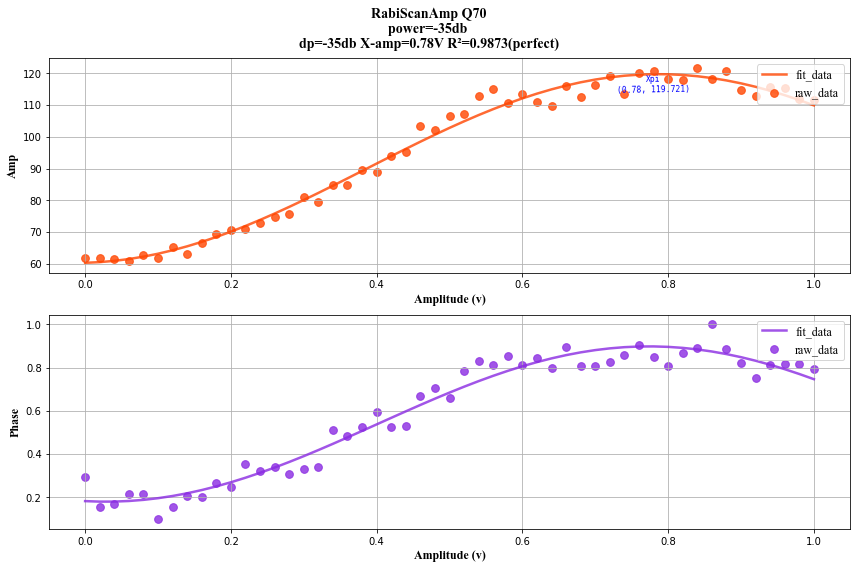

In [58]:
xd.analysis.drawer.figure

#### 检查实验质量并更新比特参数

In [46]:
xd_quality = xd.analysis.quality.descriptor
Xpi = xd.analysis.results.Xpi.value
drive_power = xd.analysis.results.drive_power.value

if xd_quality in [Quality.perfect, Quality.normal]:
    qubit.XYwave.Xpi = Xpi
    coupler.probe_XYwave.Xpi = Xpi
    qubit.XYwave.Xpi2 = round(Xpi / 2, 3)
    coupler.probe_XYwave.Xpi2 = round(Xpi / 2, 3)
    qubit.drive_power = drive_power
    coupler.probe_drive_power = drive_power
    pyqlog.info(f'Update {coupler} Xpi {qubit.XYwave.Xpi}v, Xpi2 {qubit.XYwave.Xpi2}v, drive_power {qubit.drive_power}db')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-09 16:44:22 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) Xpi 0.68v, Xpi2 0.34v, drive_power -33.6db
2022-12-09 16:44:22 |  UPDATE  | Save c7071 to data service success.


### ReadoutFreqCalibrate

读取频率优化，此实验执行两次腔能谱实验，第一次不加驱动脉冲测量，第二次加驱动脉冲测量，通过分析两个子实验选择合适的读取频率。

In [74]:
qubit.probe_power=-36

2022-12-09 16:27:52 |   EXP    | CavityFreqSpectrum register success, id 6392f188547fe93c49778927
2022-12-09 16:27:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutFreqCalibrate\q70\2022-12-09\16.27.52\CavityFreqSpectrum\16-27-52-xy_pulse amp=0\


<IPython.core.display.Javascript object>


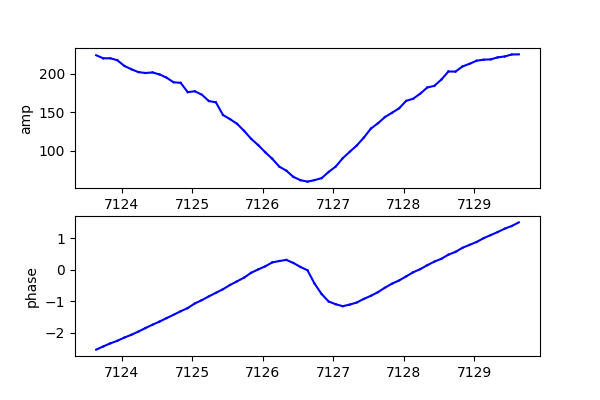

  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-09 16:28:35 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality       | 
----------------------------------------------------------
|  fr  |    fc    | 7126.638 | MHz  | R²=0.9974(perfect) | 
2022-12-09 16:28:35 |   EXP    | CavityFreqSpectrum register success, id 6392f1b3547fe93c49778929
2022-12-09 16:28:35 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutFreqCalibrate\q70\2022-12-09\16.27.52\CavityFreqSpectrum\16-28-35-xy_pulse amp=0.7\


<IPython.core.display.Javascript object>


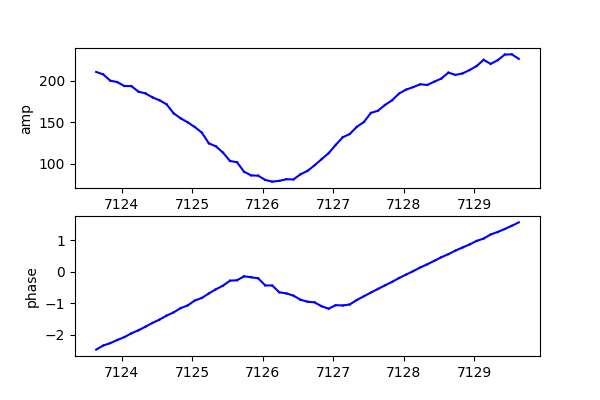

  0%|          | 0/61 [00:00<?, ?it/s]

2022-12-09 16:29:18 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
|  fr  |    fc    | 7126.18 | MHz  | R²=0.9977(perfect) | 
2022-12-09 16:29:18 |  RESULT  | Experiment results as follow:
|      name       |   describe   |       value       | unit | quality | 
-----------------------------------------------------------------------
|       fr        |  CavityFreq  |     7126.409      | MHz  |  None   | 
|     mean_fr     |     Mean     |     7126.409      | MHz  |  None   | 
|   distance_fr   |   Distance   |     7126.335      | MHz  |  None   | 
| intersection_fr | Intersection |     7126.235      | MHz  |  None   | 
|    distance     | max amp gap  | 75.19146008070462 |  v   |  None   | 
|      shift      |    shift     |       True        | None |  None   | 


In [28]:
rfc = ReadoutFreqCalibrate.from_experiment_context(context)

rfc.set_experiment_options(
#     simulator_data_path='../scripts/simulator/data/ReadoutFreqCalibrate/'
)

rfc.set_analysis_options(
    distance_flag=False, diff_threshold=0.1
)

rfc.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
)
rfc.child_experiment.set_analysis_options(
    quality_bounds=[0.98, 0.95, 0.85], is_plot=True
)

rfc.run()

#### 查看实验结果

In [24]:
pd.DataFrame(rfc.analysis.show_results())

name      value  unit  \
0    CavityFreq   7125.989   MHz   
1          Mean   7125.989   MHz   
2      Distance   7126.556   MHz   
3  Intersection   7125.856   MHz   
4   max amp gap  59.606364     v   
5         shift       True  None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                extra  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  {}   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  {}   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  {}   
3                                                                         

#### 查看实验结果图

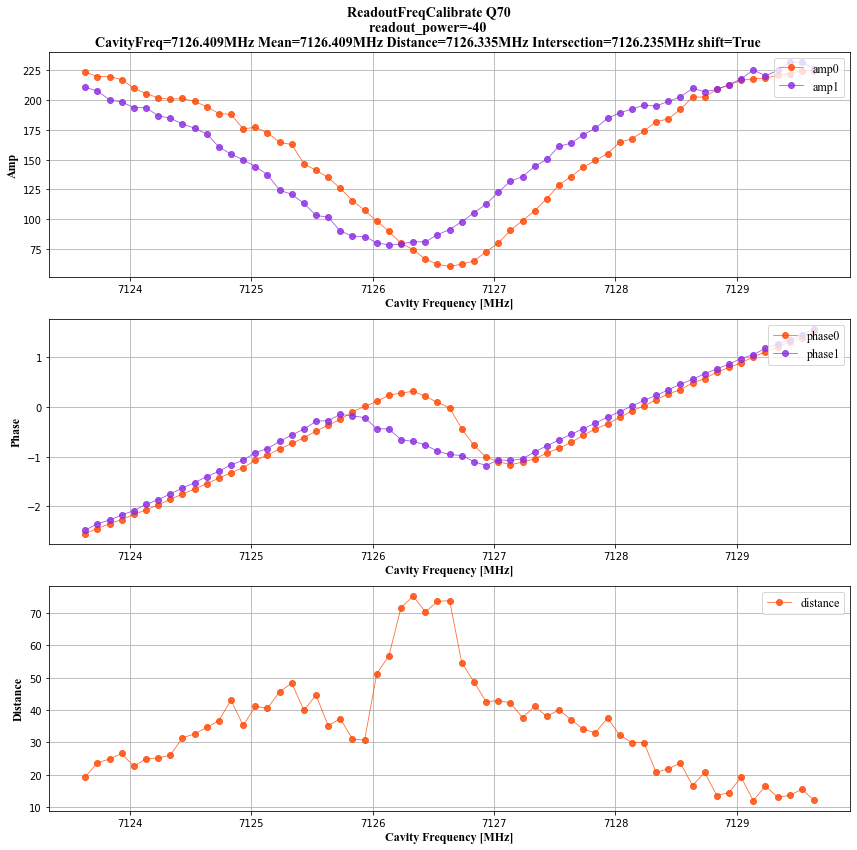

In [29]:
rfc.analysis.drawer.figure

#### 更新比特参数

In [30]:
qubit.probe_freq = rfc.analysis.results.fr.value
coupler.probe_freq = rfc.analysis.results.fr.value
coupler.save_data()

2022-12-09 16:30:38 |  UPDATE  | Save c7071 to data service success.


### ReadoutPowerCalibrate

读取功率优化，此实验固定其他参数，扫描读取频率执行 `SingleShot` 实验，找到 `IQ` 数据分的最开下的读取功率

In [31]:
rpc = ReadoutPowerCalibrate.from_experiment_context(context)

simulator_data_path = []
power_list = qarange(-40, -20, 2)

rpc.set_experiment_options(
    sweep_list=power_list,
#     simulator_data_path='../scripts/simulator/data/ReadoutPowerCalibrate/'
)

rpc.set_analysis_options(
    fidelity_threshold=[0.8, 0.5],
)

rpc.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
    repeat=5000,
)

rpc.child_experiment.set_analysis_options(
    quality_bounds=[2, 0.85, 0.7, 0.011], is_plot=True, method="GMM"
)

rpc.run()

2022-12-09 16:30:44 |   EXP    | Run SingleShot probe_power: -40
2022-12-09 16:30:44 |   EXP    | SingleShot register success, id 6392f234547fe93c49778943
2022-12-09 16:30:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-30-44-probe_power=-40\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:30:52 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.8806, 0.5162] AVE=0.6984 OL=0.0075 | None | {'q70': bad} | 
2022-12-09 16:30:52 |   EXP    | Run SingleShot probe_power: -38
2022-12-09 16:30:52 |   EXP    | SingleShot register success, id 6392f23c547fe93c4977895d
2022-12-09 16:30:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-30-52-probe_power=-38\


  0%|          | 0/2 [00:00<?, ?it/s]

status |0> and |0> are mixed and cannot be distinguished
2022-12-09 16:30:59 |  RESULT  | Experiment results as follow:
| name | describe |                      value                       | unit |   quality    | 
--------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.9304, 0.496] AVE=0.7132 OL=0.0065 | None | {'q70': bad} | 
2022-12-09 16:30:59 |   EXP    | Run SingleShot probe_power: -36
2022-12-09 16:31:00 |   EXP    | SingleShot register success, id 6392f244547fe93c49778977
2022-12-09 16:31:00 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-30-59-probe_power=-36\


  0%|          | 0/2 [00:00<?, ?it/s]

status |0> and |0> are mixed and cannot be distinguished
2022-12-09 16:31:07 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.9616, 0.4912] AVE=0.7264 OL=0.0082 | None | {'q70': bad} | 
2022-12-09 16:31:07 |   EXP    | Run SingleShot probe_power: -34
2022-12-09 16:31:08 |   EXP    | SingleShot register success, id 6392f24c547fe93c49778991
2022-12-09 16:31:08 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-31-07-probe_power=-34\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:31:15 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.9708, 0.5058] AVE=0.7383 OL=0.0073 | None | {'q70': bad} | 
2022-12-09 16:31:15 |   EXP    | Run SingleShot probe_power: -32
2022-12-09 16:31:15 |   EXP    | SingleShot register success, id 6392f253547fe93c497789ab
2022-12-09 16:31:15 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-31-15-probe_power=-32\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:31:23 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.9752, 0.5258] AVE=0.7505 OL=0.0101 | None | {'q70': bad} | 
2022-12-09 16:31:23 |   EXP    | Run SingleShot probe_power: -30
2022-12-09 16:31:23 |   EXP    | SingleShot register success, id 6392f25b547fe93c497789c5
2022-12-09 16:31:23 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-31-23-probe_power=-30\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:31:31 |  RESULT  | Experiment results as follow:
| name | describe |                      value                      | unit |   quality    | 
-------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.982, 0.5204] AVE=0.7512 OL=0.015 | None | {'q70': bad} | 
2022-12-09 16:31:31 |   EXP    | Run SingleShot probe_power: -28
2022-12-09 16:31:31 |   EXP    | SingleShot register success, id 6392f263547fe93c497789df
2022-12-09 16:31:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-31-31-probe_power=-28\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:32:28 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.9728, 0.5056] AVE=0.7392 OL=0.0209 | None | {'q70': bad} | 
2022-12-09 16:32:28 |   EXP    | Run SingleShot probe_power: -26
2022-12-09 16:32:28 |   EXP    | SingleShot register success, id 6392f29c547fe93c497789f9
2022-12-09 16:32:28 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-32-28-probe_power=-26\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:32:36 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.6578, 0.6694] AVE=0.6636 OL=0.0067 | None | {'q70': bad} | 
2022-12-09 16:32:36 |   EXP    | Run SingleShot probe_power: -24
2022-12-09 16:32:36 |   EXP    | SingleShot register success, id 6392f2a4547fe93c49778a13
2022-12-09 16:32:36 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-32-36-probe_power=-24\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:33:33 |  RESULT  | Experiment results as follow:
| name | describe |                      value                       | unit |   quality    | 
--------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.8752, 0.584] AVE=0.7296 OL=0.0237 | None | {'q70': bad} | 
2022-12-09 16:33:33 |   EXP    | Run SingleShot probe_power: -22
2022-12-09 16:33:33 |   EXP    | SingleShot register success, id 6392f2dd547fe93c49778a2d
2022-12-09 16:33:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-33-33-probe_power=-22\


  0%|          | 0/2 [00:00<?, ?it/s]

status |0> and |0> are mixed and cannot be distinguished
2022-12-09 16:33:41 |  RESULT  | Experiment results as follow:
| name | describe |                      value                       | unit |   quality    | 
--------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.886, 0.2706] AVE=0.5783 OL=0.0019 | None | {'q70': bad} | 
2022-12-09 16:33:41 |   EXP    | Run SingleShot probe_power: -20
2022-12-09 16:33:41 |   EXP    | SingleShot register success, id 6392f2e5547fe93c49778a47
2022-12-09 16:33:41 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ReadoutPowerCalibrate\q70\2022-12-09\16.30.44\SingleShot\16-33-41-probe_power=-20\


  0%|          | 0/2 [00:00<?, ?it/s]

status |1> and |1> are mixed and cannot be distinguished
2022-12-09 16:34:38 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality    | 
---------------------------------------------------------------------------------------------
| q70  |   q70    | K=3 F(0, 1)=[0.8956, 0.4978] AVE=0.6967 OL=0.0069 | None | {'q70': bad} | 
2022-12-09 16:34:38 |  RESULT  | Experiment results as follow:
|      name      |    describe    | value | unit | quality | 
------------------------------------------------------------
| optimize_field | optimize_field |  -32  | None |  None   | 
| fidelity_flag  | fidelity_flag  | True  | None |  None   | 
|  outlier_flag  |  outlier_flag  | True  | None |  None   | 
|     status     |     status     |   0   | None |  None   | 
2022-12-09 16:34:39 |   FLOW   | Readout Power Calibrate q70 Pass! Readout Power: -32


#### 查询实验结果

In [51]:
pd.DataFrame(rpc.analysis.show_results())

name value  unit extra quality
0  optimize_field   -34  None    {}    None
1   fidelity_flag  True  None    {}    None
2    outlier_flag  True  None    {}    None
3          status     0  None    {}    None

#### 查询实验结果图

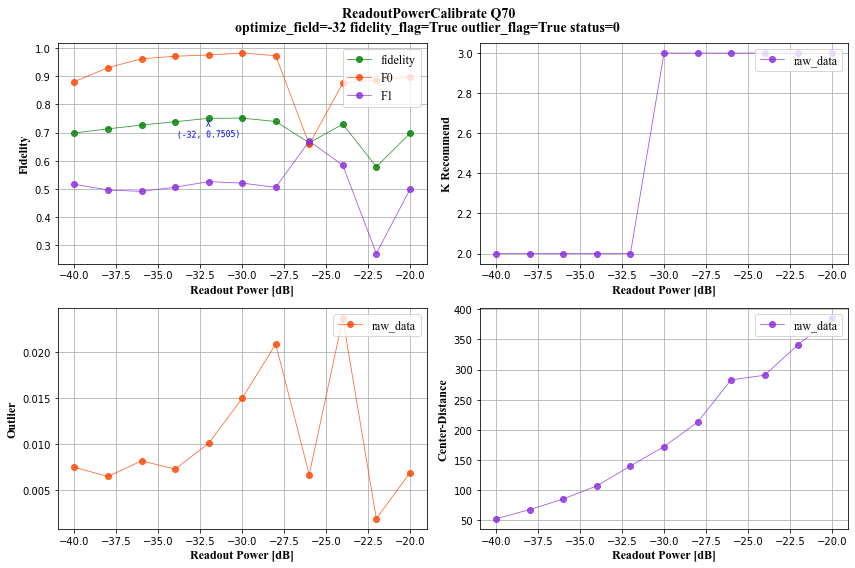

In [33]:
rpc.analysis.drawer.figure

#### 更新比特参数

In [34]:
qubit.probe_power = float(rpc.analysis.results.optimize_field.value)
coupler.probe_power = float(rpc.analysis.results.optimize_field.value)
coupler.save_data()

2022-12-09 16:34:46 |  UPDATE  | Save c7071 to data service success.


### SingleShot

获取 `IQ` 分类器

In [54]:
context.discriminators = None

In [55]:
ss = SingleShot.from_experiment_context(context)

ss.set_experiment_options(
    ac_prepare_time=8000,
    repeat=5000,
    is_check=False,
    save_bin=False,
#     simulator_data_path='../scripts/simulator/data/SingleShot/'
)

ss.set_analysis_options(
    method="GMM", quality_bounds=[2, 0.80, 0.65, 0.011], is_plot=True
)

ss.run()

2022-12-09 16:47:05 |   EXP    | SingleShot register success, id 6392f609547fe93c49778d34
2022-12-09 16:47:05 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\SingleShot\q70\2022-12-09\16.47.05\


  0%|          | 0/2 [00:00<?, ?it/s]

2022-12-09 16:47:33 |  RESULT  | Experiment results as follow:
| name | describe |                      value                      | unit |   quality    | 
-------------------------------------------------------------------------------------------
| q70  |   q70    | K=2 F(0, 1)=[0.978, 0.5322] AVE=0.7551 OL=0.008 | None | {'q70': bad} | 


#### 查询实验结果

In [108]:
pd.DataFrame(ss.analysis.show_results())

name                                      value  unit extra          quality
0  q70  K=2 F0=0.979 F1=0.733 AVE=0.856 OL=0.0105  None    {}  {'q70': normal}

#### 查询实验结果图

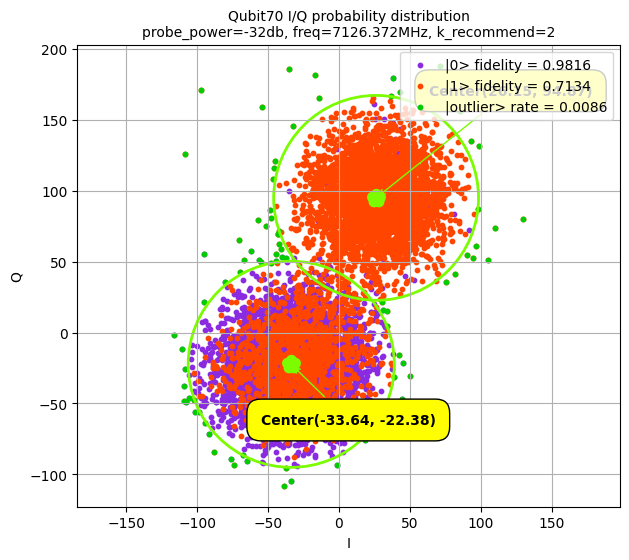

In [60]:
ss.analysis.drawer.figure

#### 为当前实验环境绑定比特判据

In [56]:
ss.save_bin_file(coupler_name, ss.discriminator)
context.configure_dcm(coupler_name)

2022-12-09 16:47:36 |  UPDATE  | Save c7071.bin to data service success.


IQdiscriminator<center=[[  32.6054184    13.14047552]
 [ -46.17277415 -100.20778959]]>

In [44]:
context.configure_dcm(coupler_name)

IQdiscriminator<center=[[-33.16904711 -21.50536615]
 [ 26.53442597  95.97226173]]>

In [ ]:
qarange(-7e-3, 5e-3, 0.5e-3)

### DriveFreqCalibrate


驱动频率校准实验，该实验通过执行两次 `Ramsey` 实验，精细校准比特的驱动频率

2022-12-09 16:36:08 |   EXP    | Ramsey register success, id 6392f378547fe93c49778adf
2022-12-09 16:36:08 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\QubitFreqCalibration\q70\2022-12-09\16.35.55\Ramsey\16-35-55-fringe=80MHz\


<IPython.core.display.Javascript object>


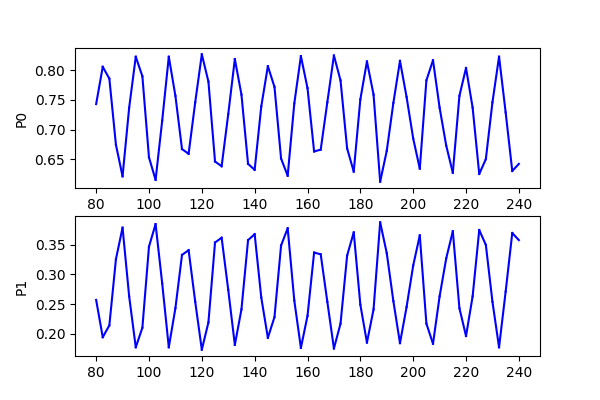

  0%|          | 0/65 [00:00<?, ?it/s]

2022-12-09 16:37:28 |   EXP    | Ramsey register success, id 6392f3c8547fe93c49778b5d
2022-12-09 16:37:28 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\QubitFreqCalibration\q70\2022-12-09\16.35.55\Ramsey\16-37-15-fringe=-80MHz\


<IPython.core.display.Javascript object>


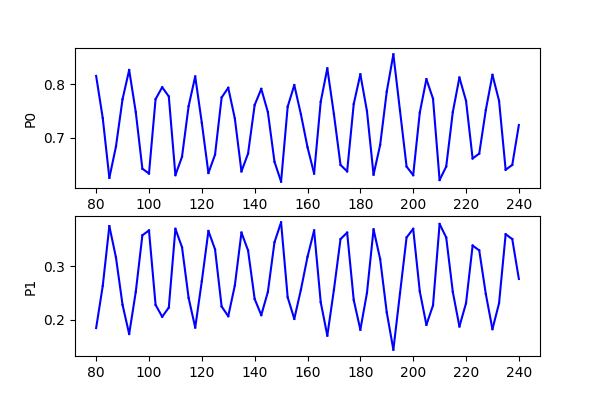

  0%|          | 0/65 [00:00<?, ?it/s]

2022-12-09 16:38:53 |  RESULT  | Experiment results as follow:
|      name       |    describe     |                              value                              | unit |     quality     | 
--------------------------------------------------------------------------------------------------------------------------------
|   f01_records   |   f01_records   | [4635.93634, 4796.63202, 4796.7456600000005, 4956.049980000001] | MHz  | Quality.perfect | 
|       f01       |       f01       |                            4796.689                             | MHz  | Quality.perfect | 
| minimum_f01_gap | minimum_f01_gap |                              0.114                              | MHz  | Quality.perfect | 


In [39]:
qfc = QubitFreqCalibration.from_experiment_context(context)

qfc.set_experiment_options(
    fringes=[80, -80],
    delays=qarange(80, 240, 2.5),
#     simulator_data_path='../scripts/simulator/data/QubitFreqCalibration/',
    show_result=True,
    
    
)

qfc.set_analysis_options(freq_gap_threshold=0.2,
                         is_plot=True)

qfc.child_experiment.set_analysis_options(
    quality_bounds=[0.98, 0.9, 0.8],
    is_plot=False
)
qfc.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
    is_dynamic=1)
qfc.run()

#### 查询实验结果图

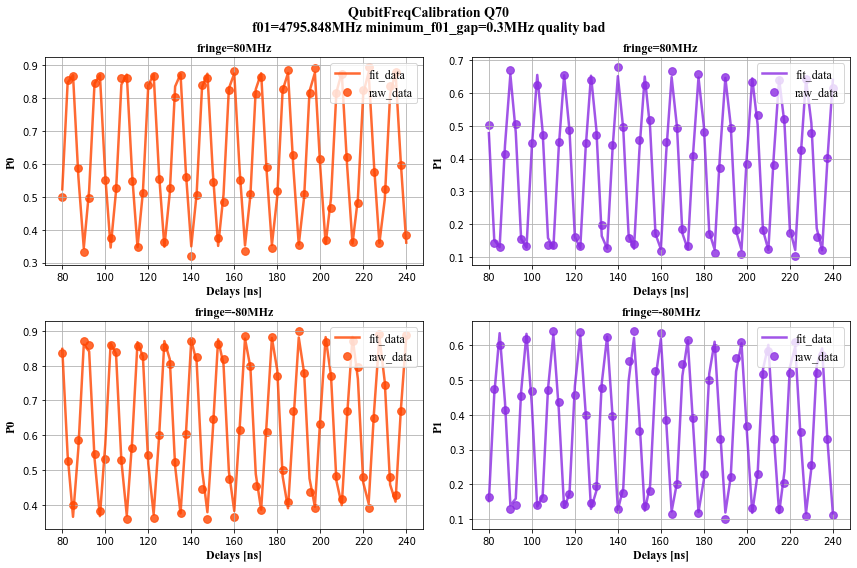

In [139]:
qfc.analysis.drawer.figure

#### 更新比特参数

In [40]:
qfc_quality = qfc.analysis.quality.value
f01 = qfc.analysis.results.f01.value
if qfc_quality == Quality.perfect:
    qubit.drive_freq = f01
    coupler.probe_drive_freq = f01
    pyqlog.info(f'Update {coupler} drive_freq {qubit.drive_freq}MHz!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-09 16:39:03 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) drive_freq 4796.689MHz!
2022-12-09 16:39:03 |  UPDATE  | Save c7071 to data service success.


### DetuneCalibration

DetuneCalibration 实验，精细校准失谐量 `detune`

2022-11-30 20:09:33 |   EXP    | theta_type: Xpi, N: 6
2022-11-30 20:09:42 |   EXP    | APE register success, id 63874806c1fa781d5ad83f29
2022-11-30 20:09:42 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\DetuneCalibration\q70\2022-11-30\20.09.33\APEComposite\20-09-33-RoughScan\APE\20-09-33-N=6\


<IPython.core.display.Javascript object>


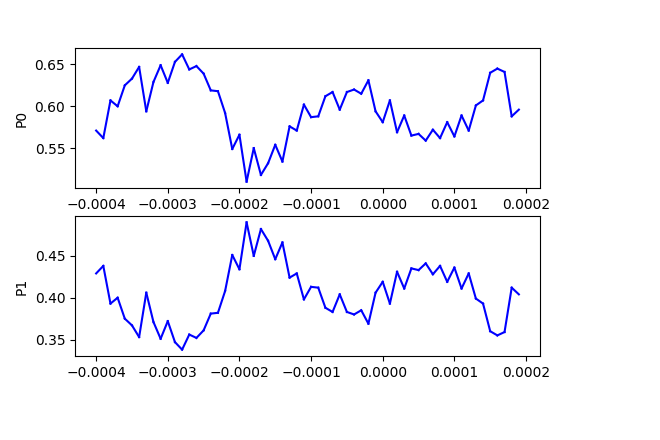

  0%|          | 0/60 [00:00<?, ?it/s]

2022-11-30 20:10:25 |  RESULT  | Experiment results as follow:
|     name     |   describe   |                                                      value                                                       | unit |    quality     | 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-0.00033999999999999986, -0.0002799999999999997, -1.9999999999999022e-05, 0.00016000000000000145] | None | R²=0.6878(bad) | 
| fit_points_0 | fit_points_0 |                          detune peaks: [-0.00029999999999999976, -4.99999999999991e-05]                          | None | R²=0.6878(bad) | 
2022-11-30 20:10:25 |   EXP    | theta_type: Xpi, N: 7
2022-11-30 20:10:33 |   EXP    | APE register success, id 63874839c1fa781d5ad83fc6
2022-11-30 20:10:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_mons

<IPython.core.display.Javascript object>


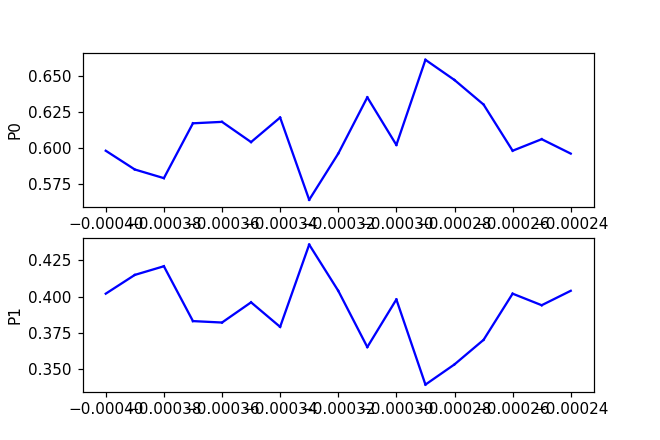

  0%|          | 0/60 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [51]:
dec = DetuneCalibration.from_experiment_context(context)

dec.set_experiment_options(
    detune_list=list(np.arange(-0.4e-3, 0.2e-3, 0.01e-3)),
    rough_n_list=[6, 7, 8],
    fine_n_list=[7, 9],
    theta_type="Xpi",
    fine_precision=0.1e-3,
#     simulator_data_path='../scripts/simulator/data/DetuneCalibration/'
)

dec.set_analysis_options(diff_threshold=0.2)


dec.run()

### 查询实验结果

In [153]:
pd.DataFrame(dec.analysis.show_results())

name  value unit extra        quality
0  detune -0.002  GHz    {}  evaluate good

### 查询实验结果图

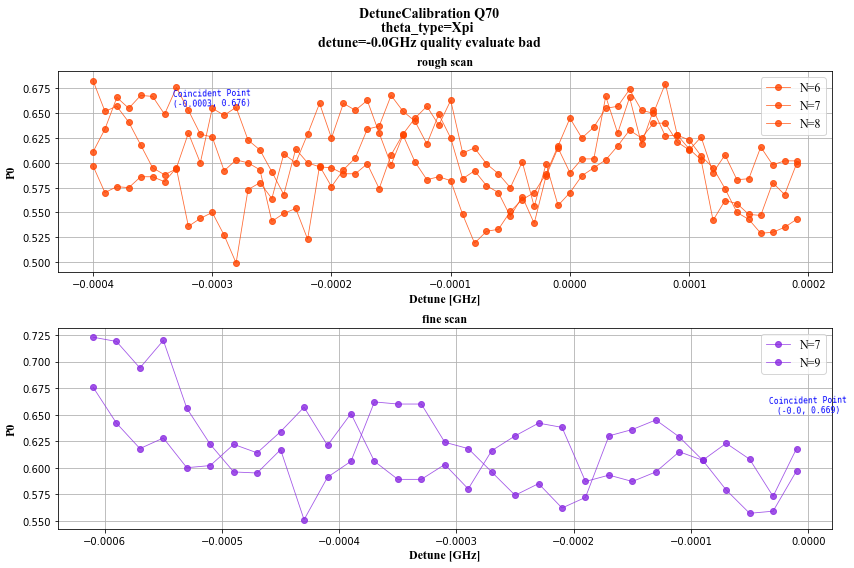

In [99]:
dec.analysis.drawer.figure

In [72]:
detune = -0.15

context.qubit.XYwave.detune_pi = detune
context.qubit.XYwave.detune_pi2 = detune
coupler.drive_XYwave.detune_pi = detune
coupler.drive_XYwave.detune_pi2 = detune
pyqlog.info(f'Update {qubit} detune_pi {qubit.XYwave.detune_pi}MHz!')
coupler.save_data()

2022-11-30 20:18:29 |   INFO   | Update Qubit(bit=70) detune_pi -0.15MHz!
2022-11-30 20:18:29 |  UPDATE  | Save c7071 to data service success.


### 更新比特参数信息

In [45]:
detune_pi = dec.analysis.results.detune.value * 1e3
if 'evaluate bad' in dec.analysis.quality:
    qubit.XYwave.detune_pi = detune_pi
    qubit.XYwave.detune_pi2 = detune_pi
    pyqlog.info(f'Update {qubit} detune_pi {qubit.XYwave.detune_pi}MHz!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-11-24 01:18:01 |   INFO   | Update Qubit(bit=70) detune_pi -1.0MHz!
2022-11-24 01:18:01 |  UPDATE  | Save q70 to data service success.


### AmpOptimize

幅值优化实验，改实验通过微调 X 门驱动幅值，精细校准 X 门幅值

2022-12-09 16:45:28 |   EXP    | theta_type: Xpi, N: 7
2022-12-09 16:45:38 |   EXP    | AmpOptimize register success, id 6392f5b2547fe93c49778d1a
2022-12-09 16:45:38 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\AmpOptimize\q70\2022-12-09\16.45.28\


<IPython.core.display.Javascript object>


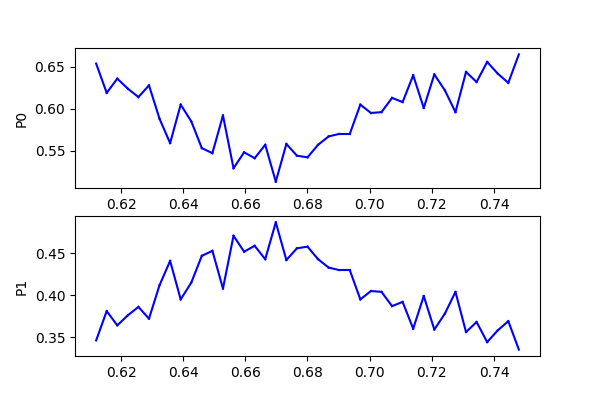

  0%|          | 0/41 [00:00<?, ?it/s]

2022-12-09 16:46:35 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |    quality     | 
----------------------------------------------------
| Xpi  |  X-amp   | 0.6698 |  V   | R²=0.8174(bad) | 


In [51]:
ao = AmpOptimize.from_experiment_context(context)
ao.set_experiment_options(
    ac_prepare_time=8000,
    theta_type="Xpi", N=7,
    points=41,
#     simulator_data_path='../scripts/simulator/data/AmpOptimize/'
)

ao.run()

#### 查询实验结果

In [159]:
pd.DataFrame(ao.analysis.show_results())

name  value unit extra            quality
0  X-amp   0.82    V    {}  R²=0.9697(normal)

#### 查询实验结果图

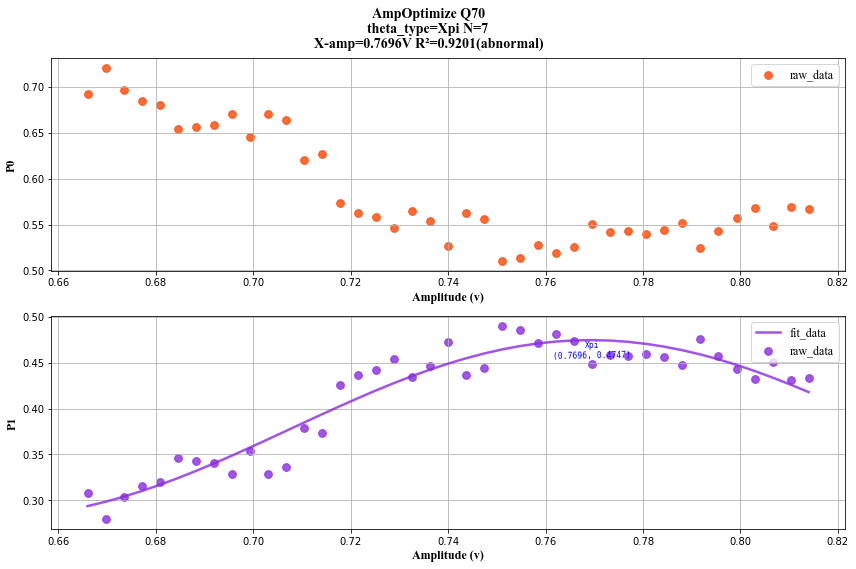

In [41]:
ao.analysis.drawer.figure

#### 更新比特参数

In [53]:
ao_quality = ao.analysis.quality.descriptor
Xpi = ao.analysis.results.Xpi.value

if ao_quality == Quality.bad:
    qubit.XYwave.Xpi = Xpi
    coupler.probe_XYwave.Xpi = Xpi
    pyqlog.info(f'Update {coupler} Xpi {qubit.XYwave.Xpi}V!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-09 16:46:50 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) Xpi 0.6698V!
2022-12-09 16:46:50 |  UPDATE  | Save c7071 to data service success.


## coupler表征

### 更新coupler读取参数
    如果probe qubit已经被校准好了，可略去上面校准过程，直接跳到该步骤，将probe qubit参数传给coupler即可
    未完待续。。。

In [ ]:
coupler = get_parameters('coupler',coupler_name)
qubit = get_parameters('qubit',coupler.probe_bit)
coupler.probe_freq = qubit.probe_freq
coupler.probe_drive_power = qubit.probe_drive_power
coupler.probe_drive_freq = qubit.drive_freq
coupler.probe_drive_power = qubit.drive_power


### 环境创建

In [57]:
def coupler_cali_context(
    coupler_name: str,
    parking_bits: list,
    parking_zamp: list,
    env_bit: list,
    use_dcm: bool = False,
    ac_switch: bool = True
):
    """ 应用场景：
        - 单比特表征所有流程
    """
    context = ExperimentContext(conf_file)
    context.configure_inst()

    context.configure_coupler_cali_infos(coupler_name)
    
    
    new_env_bit = []
    for bit in env_bit:
        base_bit = context.get_base_qubit(bit)
        if base_bit.name in parking_bits:
            base_bit.ac = base_bit.dc_max + parking_zamp[parking_bits.index(base_bit.name)]
        elif base_bit.name == coupler_name:
            base_bit.ac = base_bit.dc_max
        elif base_bit.name in [context.qubits[0].name, context.qubits[1].name]:
            base_bit.ac = base_bit.dc_max

        elif isinstance(base_bit, Qubit):
            base_bit.ac = base_bit.dc_min
        else:
            base_bit.ac = base_bit.dc_max
        new_env_bit.append(base_bit)
    

    if ac_switch:
        context.maximize_compensate()
    else:
        context.minimize_compensate()
    context.configure_environment(new_env_bit)
    context.configure_crosstalk_dict()

    if use_dcm:
        context.configure_dcm(coupler_name)

    return context

In [58]:
coupler = get_parameters('coupler',coupler_name)
context = coupler_cali_context(coupler_name, parking_bits, parking_zamp, ENV_BIT, use_dcm=True, ac_switch=True)

2022-12-09 16:48:06 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |           coupler_freestyle            |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|

2022-12-09 16:48:06 |   INFO   | transform c7071 to drive q71 | probe q70
2022-12-09 16:48:07 | WARNING  | Qubit(bit=71) is already exist in current environment.
2022-12-09 16:48:07 | WARNING  | Qubit(bit=70) is already exist in current environment.
2022-12-09 16:48:07 | WARNING  | Coupler(bit=7071, driveQ71, probeQ70) is already exist in current environment.


In [61]:
qubit = context.qubit

In [95]:
# context.configure_inst()
# context.configure_coupler_cali_infos(coupler_name)

# new_env_bit = []
# for bit in ENV_BIT:
#     base_bit = context.get_base_qubit(bit)
#     if isinstance(base_bit, Qubit) and base_bit.bit != coupler.probe_bit:
#         base_bit.ac = base_bit.dc_min
#     elif base_bit.bit != coupler.bit:
#         base_bit.ac = base_bit.dc_max
#     else:
#         base_bit.ac = base_bit.dc_max + 0.01
#     new_env_bit.append(base_bit)

# # 开启使用全局 AC 功能
# context.maximize_compensate()

# context.configure_environment(new_env_bit)



# context.configure_crosstalk_dict()
# qubit = context.qubit
# # qubit.ac = qubit.dc_min

2022-12-01 12:18:46 |   INFO   | transform c7071 to drive q72 | probe q70
2022-12-01 12:18:46 | WARNING  | Qubit(bit=72) is already exist in current environment.
2022-12-01 12:18:46 | WARNING  | Qubit(bit=70) is already exist in current environment.
2022-12-01 12:18:46 | WARNING  | Coupler(bit=7071, driveQ72, probeQ70) is already exist in current environment.


#### 检索实验环境配置参数

In [145]:
pd.DataFrame(context.context_table())

parameter  \
0          config   
1          qubits   
2        couplers   
3  discriminators   
4     compensates   
5      working_dc   
6  crosstalk_dict   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                object  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               F:\MonsterTest_QT8013\conf\config.conf   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [Qubit(bit=71), Qubit(bit=70)]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [Coupler(bit=7071, driveQ71, probeQ70)]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    K=2 F(0, 1)=[0.9764, 0.7082] AVE=0.8423 OL=0.0084   
4  {Qubit(bit=64): PulseCorrectionQ64, Qubit(bit=65): PulseCorrectionQ65, Qubit(bit=69): PulseCorrectionQ69, Qubit(bit=70): PulseCorrectionQ70, Qubit(bit=71): PulseCorrectionQ71, Qubit(bit=72): PulseCorrectionQ72, Coupler(bit=6470, driveQ64, probeQ70): PulseCorrectionC6470, Coupler(bit=6571, driveQ65, probeQ71): PulseCorrectionC6571, Coupler(bit=6970, driveQ69, probeQ70): PulseCorrectionC6970, Coupler(bit=7071, driveQ71, probeQ70): PulseCorrectionC7071, Coupler(bit=7172, driveQ71, probeQ72): PulseCorrectionC7172}   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 True   
6                                                                                                                                                                                        

In [146]:
get_parameters('coupler',7071).drive_XYwave.time

200

#### 检索probe初始比特参数信息

In [129]:
pd.DataFrame(context.base_qubit_table(context.coupler))

parameter                                        value  \
0                      tunable                                         True   
1                     goodness                                        False   
2                   drive_freq                                     6253.394   
3                  drive_power                                          -10   
4                   probe_freq                                     7126.372   
5                  probe_power                                          -32   
6                     tls_freq                                         None   
7                anharmonicity                                         -240   
8                           dc                                          0.0   
9                       dc_max                                        0.107   
10                      dc_min                                       -0.046   
11                          ac                                        0.107   
12                          T1                                        20000   
13                          T2                                        10000   
14              z_flux_channel                                           19   
15                z_dc_channel                                            9   
16                  idle_point                                          0.0   
17                 ac_spectrum  Options(standard=[0.0, 0.0, 0.0, 0.0, 0.0])   
18         readout_point_model                              FlatTopGaussian   
19               readout_point       Options(amp=0.0, sigma=1.25, buffer=5)   
20                   drive_bit                                           71   
21                   probe_bit                                           70   
22            probe_drive_freq                                     4796.512   
23           probe_drive_power                                          -35   
24            drive_XYwave.Xpi                                         0.68   
25           drive_XYwave.Xpi2                                         0.34   
26            drive_XYwave.Ypi                                         None   
27           drive_XYwave.Ypi2                                         None   
28            drive_XYwave.Zpi                                         None   
29  drive_XYwave.baseband_freq                                      566.667   
30          drive_XYwave.delta                                         -240   
31      drive_XYwave.detune_pi                                          0.0   
32     drive_XYwave.detune_pi2                                          0.0   
33          drive_XYwave.alpha                                            1   
34         drive_XYwave.offset                                          5.0   
35           drive_XYwave.time                                           20   
36            probe_XYwave.Xpi                                         0.76   
37           probe_XYwave.Xpi2                                         0.38   
38            probe_XYwave.Ypi                                         None   
39           probe_XYwave.Ypi2                                         None   
40            probe_XYwave.Zpi                                         None   
41  probe_XYwave.baseband_freq                                      566.667   
42          probe_XYwave.delta                                         -240   
43      probe_XYwave.detune_pi                                          0.0   
44     probe_XYwave.detune_pi2                                          0.0   
45          probe_XYwave.alpha                                            1   
46         probe_XYwave.offset                                          5.0   
47           probe_XYwave.time                                          980   

   unit update_time  
0     -        None  
1     -        None  
2   MHz        None  
3    db        None  
4   MHz        None  
5    db        No

#### 检索 DC(AC) 配置信息

In [59]:
pd.DataFrame(context.work_dc_table())

qubit z_dc_channel    value
0  Coupler(bit=7172)            9     0.0v
1      Qubit(bit=71)           21  -0.278v

In [60]:
pd.DataFrame(context.work_ac_table())

qubit  z_flux_channel    value  \
0                           Qubit(bit=64)              14   0.094v   
1                           Qubit(bit=65)               9   0.083v   
2                           Qubit(bit=69)              22   0.117v   
3                           Qubit(bit=70)              21  -0.063v   
4                           Qubit(bit=71)              18  -0.057v   
5                           Qubit(bit=72)              13   0.109v   
6   Coupler(bit=6470, driveQ64, probeQ70)              23  -0.133v   
7   Coupler(bit=6571, driveQ65, probeQ71)              16  -0.125v   
8   Coupler(bit=6970, driveQ69, probeQ70)              24   0.089v   
9   Coupler(bit=7071, driveQ71, probeQ70)              19   0.108v   
10  Coupler(bit=7172, driveQ71, probeQ72)              20   0.087v   

      m_pulse_model                          m_pulse_params  \
0   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
1   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
2   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
3   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
4   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
5   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
6   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
7   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
8   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
9   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
10  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   

              compensate  
0     PulseCorrectionQ64  
1     PulseCorrectionQ65  
2     PulseCorrectionQ69  
3     PulseCorrectionQ70  
4     PulseCorrectionQ71  
5     PulseCorrectionQ72  
6   PulseCorrectionC6470  
7   PulseCorrectionC6571  
8   PulseCorrectionC6970  
9   PulseCorrectionC7071  
10  PulseCorrectionC7172

#### 检索线路补偿器信息

In [83]:
pd.DataFrame(context.compensates_table())

name  x_delay  z_delay  z_compensate  distortion_width  \
0     q64      0.0    0.000           0.0               0.0   
1     q65      0.0    0.000           0.0               0.0   
2     q69      0.0    0.000           0.0               0.0   
3     q70      0.0   30.000           0.0            4405.0   
4     q71      0.0   28.750           0.0            7605.0   
5     q72      0.0    0.000           0.0               0.0   
6   c6470      0.0    0.000           0.0               0.0   
7   c6571      0.0    0.000           0.0               0.0   
8   c6970      0.0    0.000           0.0               0.0   
9   c7071      0.0   35.625           0.0            9905.0   
10  c7172      0.0    0.000           0.0               0.0   

    distortion_data_len distortion_ab distortion_type  
0                     0            []           width  
1                     0            []           width  
2                     0            []           width  
3                   157            []           width  
4                 12169            []           width  
5                     0            []           width  
6                     0            []           width  
7                     0            []           width  
8                     0            []           width  
9                 15849            []           width  
10                    0            []           width

### CouplerSpecturm

In [128]:
context.qubit

Qubit(bit=71)

#### coupler能谱细扫实验

2022-12-09 17:15:21 |   EXP    | CouplerSpectrum register success, id 6392fca9547fe93c49778d48
2022-12-09 17:15:21 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerSpectrum\q70q71c7071\2022-12-09\17.15.21\


<IPython.core.display.Javascript object>


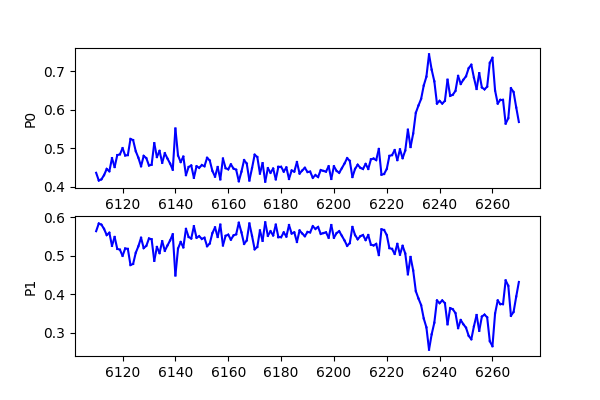

  0%|          | 0/161 [00:00<?, ?it/s]

2022-12-09 17:17:11 |  RESULT  | Experiment results as follow:
| name  | describe |  value   | unit |      quality       | 
-----------------------------------------------------------
| peaks |  peaks   | [6236.0] | MHz  | SNR=2.378(perfect) | 


In [71]:
cs_exp = CouplerSpectrum.from_experiment_context(context)

cs_exp.set_experiment_options(
    ac_prepare_time=8000,
    freq_list=qarange(6110, 6270, 1),
    drive_power=-22,
    z_amp=0,
    use_square=True,
    band_width=10,
    fine_flag=False,
    xpulse_params = {
            "time": 5000,
            "offset": 15,
            "amp": 1,
            "detune": 0,
            "freq": 566.667
        },
#     simulator_data_path='../scripts/simulator/data/QubitSpectrum/5000Mhz/fine/'
)

cs_exp.set_analysis_options(
    snr_bounds=1.5,
    quality_bounds=[0.8, 0.6, 0.5],
    is_plot=True,
)

cs_exp.run()

#### 查看实验结果

In [48]:
pd.DataFrame(qs_exp.analysis.show_results())

name     value unit extra             quality
0  f01  4796.049  MHz    {}  R²=0.9515(perfect)

#### 查看实验结果图

In [21]:
qs_exp.analysis.drawer.figure

NameError: name 'qs_exp' is not defined

In [14]:
cs_exp.analysis.results.freq.value

6253.469

### RabiScanWidth

扫描 `Drag` 的脉冲宽度，通过其振荡规律判断比特频率是否正确

2022-12-05 23:22:52 |   EXP    | CouplerRabiScanWidth register success, id 638e0ccc816e7386c64e7335
2022-12-05 23:22:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerRabiScanWidth\q70q71c7071\2022-12-05\23.22.44\


<IPython.core.display.Javascript object>


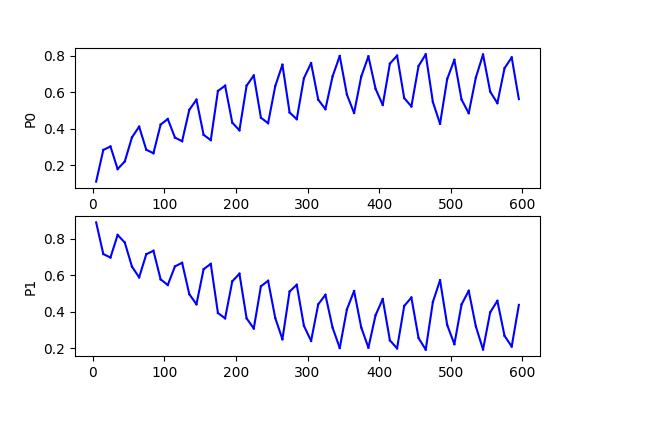

  0%|          | 0/60 [00:00<?, ?it/s]

2022-12-05 23:23:34 |  RESULT  | Experiment results as follow:
|    name     |  describe   | value | unit |    quality     | 
-------------------------------------------------------------
| oscillating | oscillating | False | None | R²=0.6141(bad) | 


In [15]:
rsw = CouplerRabiScanWidth.from_experiment_context(context)

rsw.set_experiment_options(
    ac_prepare_time=1000,
    drive_freq=6253.469,
    drive_power=-10,
    widths = qarange(5, 600, 10),
#     simulator_data_path='../scripts/simulator/data/RabiScanWidth'
)

rsw.run()

#### 查看实验结果

In [53]:
pd.DataFrame(rsw.analysis.show_results())

name  value  unit extra             quality
0  oscillating   True  None    {}  R²=0.9952(perfect)

#### 查看实验结果图

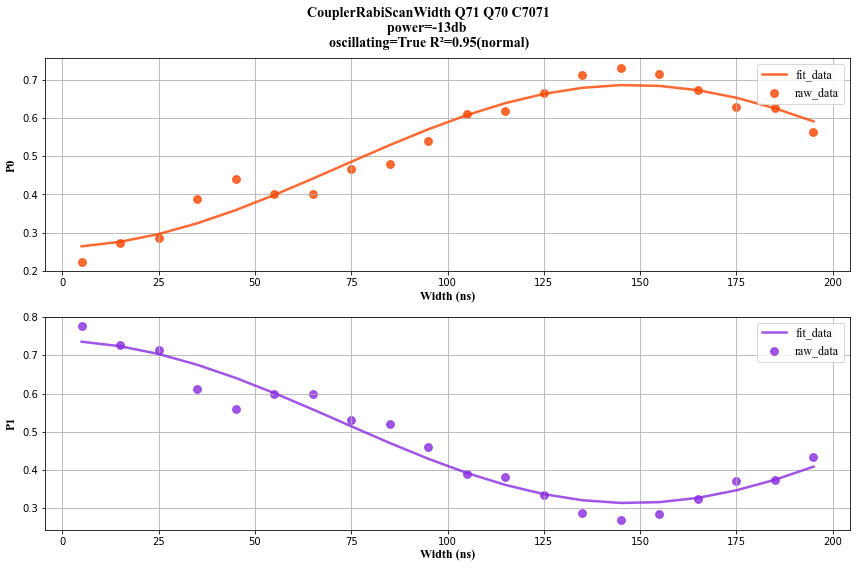

In [18]:
rsw.analysis.drawer.figure

#### 根据能谱和 RabiWidth 判断是否更新比特频率

In [16]:
cs_quality = cs_exp.analysis.quality.descriptor
oscillating = rsw.analysis.results.oscillating.value

if cs_quality in [Quality.perfect, Quality.normal] and oscillating is True:
    coupler.drive_freq = cs_exp.analysis.results.freq.value
    coupler.drive_power = cs_exp.experiment_options.drive_power
    context.coupler.drive_freq = cs_exp.analysis.results.freq.value
    context.coupler.drive_power = cs_exp.experiment_options.drive_power
    context.qubit.drive_freq = cs_exp.analysis.results.freq.value
    context.qubit.drive_power = cs_exp.experiment_options.drive_power
    pyqlog.info(f'Update {coupler} drive_freq {coupler.drive_freq}MHz, drive_power {coupler.drive_power}db')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-05 23:23:34 |   INFO   | Experiment results bad, please check!


In [20]:
f01 = 6253.469
context.coupler.drive_freq = f01
coupler.drive_freq = f01
qubit.drive_freq = f01

### XpiDetection

XpiDetune 实验是对 RabiScanAmp 实验的封装， 扫描 `Drag` 幅值，粗测 `X` 门幅值

In [21]:
coupler.drive_XYwave.time = 50
qubit.XYwave.time = 50
context.coupler.drive_XYwave.time = 50
coupler.save_data()

2022-12-05 23:25:24 |  UPDATE  | Save c7071 to data service success.


In [107]:
context.coupler.drive_XYwave.time 2

20

In [9]:
xd = CouplerRabiScanAmp.from_experiment_context(context)

xd.set_experiment_options(
    ac_prepare_time=1000,
    amps=qarange(0, 1, 0.02),
    drive_power=-18,
    name="Xpi",
#     simulator_data_path='../scripts/simulator/data/XpiDetection/'coupler
)



xd.run()

KeyboardInterrupt: 

#### 查看实验结果

In [57]:
pd.DataFrame(xd.analysis.show_results())

name  value unit extra             quality
0     dp -35.00   db    {}  R²=0.9873(perfect)
1  X-amp   0.78    V    {}  R²=0.9873(perfect)

#### 查看实验结果图

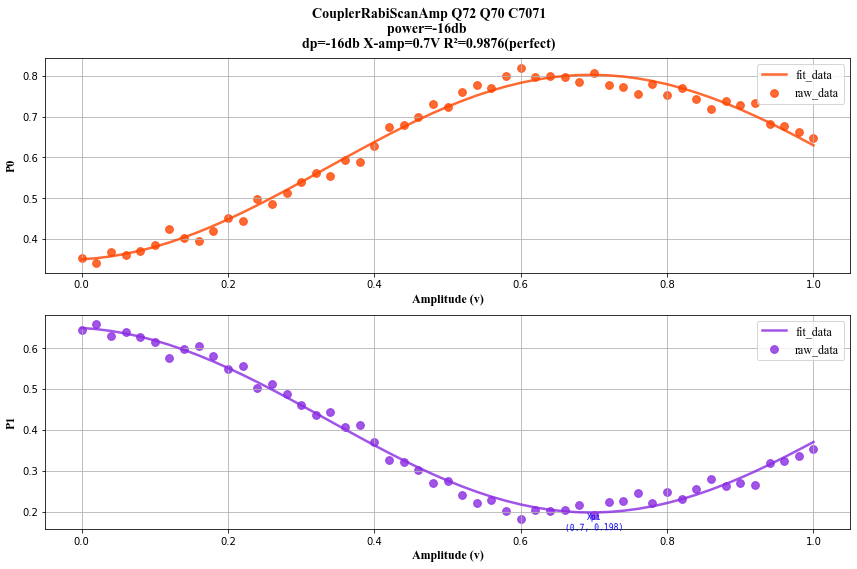

In [103]:
xd.analysis.drawer.figure

#### 检查实验质量并更新比特参数

In [23]:
xd_quality = xd.analysis.quality.descriptor
Xpi = xd.analysis.results.Xpi.value
drive_power = xd.analysis.results.drive_power.value

if xd_quality in [Quality.perfect, Quality.normal, Quality.bad]:
    qubit.XYwave.Xpi = Xpi
    coupler.drive_XYwave.Xpi = Xpi
    context.coupler.drive_XYwave.Xpi = Xpi
    qubit.XYwave.Xpi2 = round(Xpi / 2, 3)
    coupler.drive_XYwave.Xpi2 = round(Xpi / 2, 3)
    context.coupler.drive_XYwave.Xpi2 = round(Xpi / 2, 3)
    qubit.drive_power = drive_power
    coupler.drive_power = drive_power
    context.coupler.drive_power = drive_power
    pyqlog.info(f'Update {coupler} Xpi {qubit.XYwave.Xpi}v, Xpi2 {qubit.XYwave.Xpi2}v, drive_power {qubit.drive_power}db')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-05 23:26:12 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) Xpi 0.72v, Xpi2 0.36v, drive_power -18db
2022-12-05 23:26:12 |  UPDATE  | Save c7071 to data service success.


### DriveFreqCalibrate


驱动频率校准实验，该实验通过执行两次 `Ramsey` 实验，精细校准比特的驱动频率

2022-12-05 23:30:41 |   EXP    | CouplerRamsey register success, id 638e0ea1813722c062b94b08
2022-12-05 23:30:41 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerRamsey\q70q71c7071\2022-12-05\23.30.32\


<IPython.core.display.Javascript object>


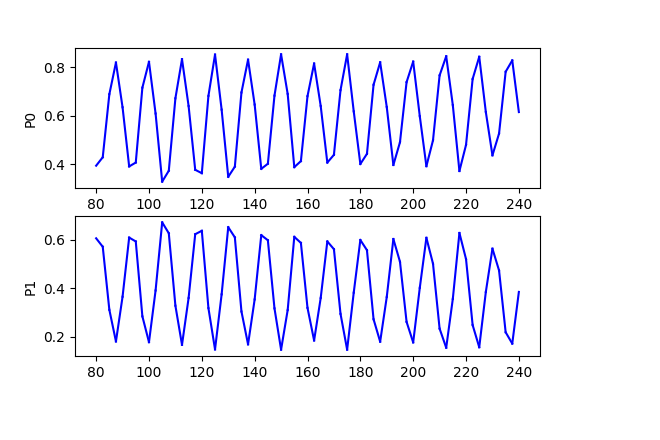

  0%|          | 0/65 [00:00<?, ?it/s]

2022-12-05 23:31:26 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality      | 
---------------------------------------------------------
| freq |   fosc   | 80.30249 | MHz  | R²=0.9759(normal) | 


In [10]:
cr = CouplerRamsey.from_experiment_context(context)

cr.set_experiment_options(
    ac_prepare_time=1000,
    delays=qarange(80, 240, 2.5),
    fringe=566.667+80,
#     schedule_measure=True,
#     zamp=0.1,
#     simulator_data_path='../data/CouplerRamsey/',
#     schedule_index='all'
)
cr.run()


In [138]:
cr.driveQ.drive_freq

6253.394

In [3]:
qfc = CouplerFreqCalibration.from_experiment_context(context)

qfc.set_experiment_options(
    fringes=[80, -80],
    delays=qarange(80, 240, 2.5),
#     simulator_data_path='../scripts/simulator/data/QubitFreqCalibration/',
    show_result=True,
    
    
)

qfc.set_analysis_options(freq_gap_threshold=0.2,
                         is_plot=True)

qfc.child_experiment.set_analysis_options(
    quality_bounds=[0.98, 0.9, 0.8],
    is_plot=True
)
qfc.child_experiment.set_experiment_options(is_dynamic=1,show_result=True,ac_prepare_time=1000,)
qfc.run()

NameError: name 'context' is not defined

#### 查询实验结果图

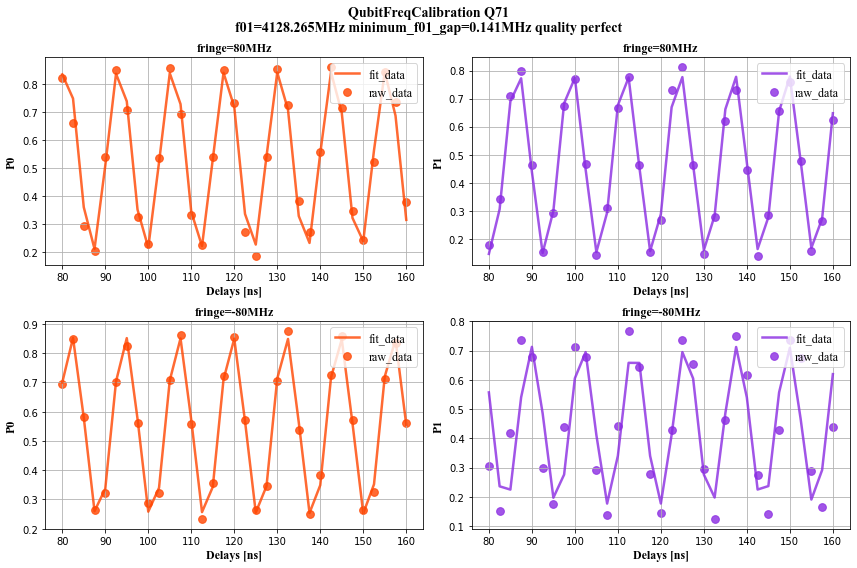

In [46]:
qfc.analysis.drawer.figure

#### 更新比特参数

In [12]:
qfc_quality = qfc.analysis.quality.value
f01 = qfc.analysis.results.f01.value
if qfc_quality :
    coupler.drive_freq = f01
    qubit.drive_freq = f01
    context.coupler.drive_freq = f01
    pyqlog.info(f'Update {coupler} drive_freq {coupler.drive_freq}MHz!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-05 23:33:51 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) drive_freq 6253.823MHz!
2022-12-05 23:33:51 |  UPDATE  | Save c7071 to data service success.


### AmpOptimize

幅值优化实验，改实验通过微调 X 门驱动幅值，精细校准 X 门幅值

2022-12-05 23:39:59 |   EXP    | theta_type: Xpi, N: 7
2022-12-05 23:40:04 |   EXP    | CouplerAmpOptimize register success, id 638e10d4813722c062b94c7f
2022-12-05 23:40:04 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerAmpOptimize\q70q71c7071\2022-12-05\23.39.59\


<IPython.core.display.Javascript object>


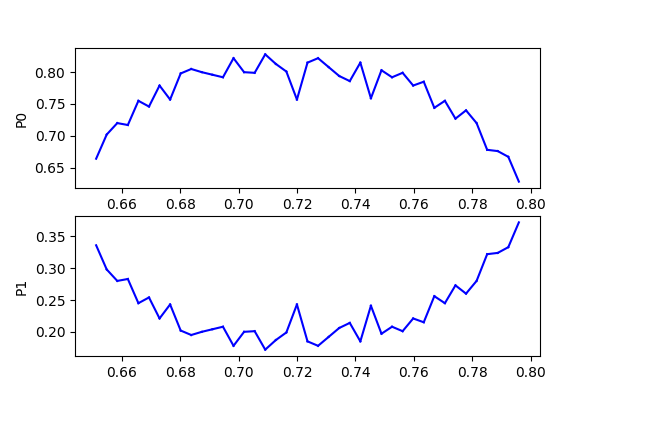

  0%|          | 0/41 [00:00<?, ?it/s]

2022-12-05 23:40:34 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |       quality       | 
--------------------------------------------------------
| Xpi  |  X-amp   | 0.72  |  V   | R²=0.8759(abnormal) | 


In [17]:
ao = CouplerAmpOptimize.from_experiment_context(context)
ao.set_experiment_options(
    ac_prepare_time=1000,
    theta_type="Xpi", N=7,
    points=41,
#     simulator_data_path='../scripts/simulator/data/AmpOptimize/'
)

ao.run()

#### 查询实验结果

In [159]:
pd.DataFrame(ao.analysis.show_results())

name  value unit extra            quality
0  X-amp   0.82    V    {}  R²=0.9697(normal)

#### 查询实验结果图

In [ ]:
ao.analysis.drawer.figure

#### 更新比特参数

In [14]:
ao_quality = ao.analysis.quality.descriptor
Xpi = ao.analysis.results.Xpi.value

if ao_quality == Quality.abnormal:
    coupler.drive_XYwave.Xpi = Xpi
    qubit.XYwave.Xpi = Xpi
    pyqlog.info(f'Update {coupler} Xpi {coupler.drive_XYwave.Xpi}V!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-05 23:34:49 |   INFO   | Update Coupler(bit=7071, driveQ71, probeQ70) Xpi 0.7236V!
2022-12-05 23:34:49 |  UPDATE  | Save c7071 to data service success.


### T1

测量比特纵向退相干时间 `T1`

In [8]:
t1_exp = CouplerT1.from_experiment_context(context)
t1_exp.set_experiment_options(
    delay_list=qarange(0, 15000, 400),
#     simulator_data_path='../scripts/simulator/data/T1/'
)

t1_exp.run()

TypeError: bad operand type for abs(): 'str'

#### 查看实验结果

In [ ]:
pd.DataFrame(t1_exp.analysis.show_results())

#### 查看实验结果图

In [ ]:
t1_exp.analysis.drawer.figure

#### 更新比特参数

In [ ]:
t1_quality = t1_exp.analysis.quality.descriptor
t1 = t1_exp.analysis.results.tau.value * 1e3

if t1_quality == Quality.perfect:
    coupler.T1 = t1
    pyqlog.info(f'Update {coupler} T1 {coupler.T1}ns!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

In [ ]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'sample_width', 'XYwave', 'T1']
    )
)

### T2

测量比特横向退相干时间 `T2`

2022-12-05 23:35:12 |   EXP    | T2Ramsey run_once count: 0
2022-12-05 23:35:34 |   EXP    | CouplerT2Ramsey register success, id 638e0fc6813722c062b94c52
2022-12-05 23:35:34 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerT2Ramsey\q70q71c7071\2022-12-05\23.35.12\
2022-12-05 23:35:35 |   EXP    | fringe: 562.667 MHZ, zamp: None v


<IPython.core.display.Javascript object>


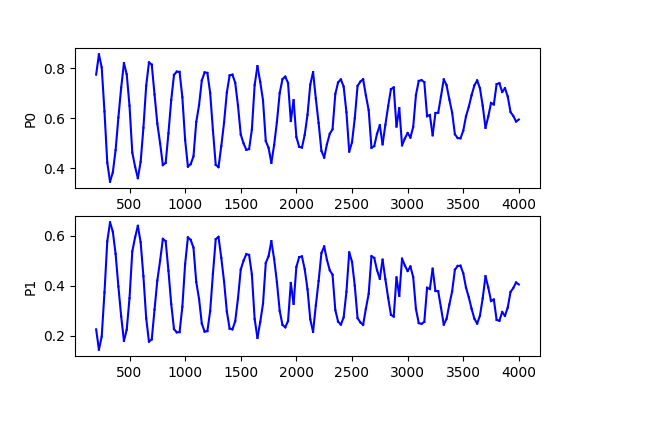

  0%|          | 0/153 [00:00<?, ?it/s]

2022-12-05 23:37:20 |  RESULT  | Experiment results as follow:
|  name   | describe |      value      | unit |       quality       | 
---------------------------------------------------------------------
|   tau   |  T2star  |  3.03082427251  |  us  | R²=0.8371(abnormal) | 
|  freq   |   fosc   |     4.14559     | MHz  | R²=0.8371(abnormal) | 
| t2_rate | t2_rate  | 0.7577060681275 | None | R²=0.8371(abnormal) | 


In [15]:
t2_exp = CouplerT2Ramsey.from_experiment_context(context)
t2_exp.set_experiment_options(
    delays=qarange(200, 4000, 25),
    fringe=566.667 - 4,
    max_loops=1
#     simulator_data_path='../scripts/simulator/data/T2/'
)

t2_exp.run()

#### 查询实验结果

In [44]:
pd.DataFrame(t2_exp.analysis.show_results())

name       value  unit extra         quality
0   T2star  277.601144    us    {}  R²=0.1695(bad)
1     fosc    3.889030   MHz    {}  R²=0.1695(bad)
2  t2_rate   55.520229  None    {}  R²=0.1695(bad)

#### 查询实验结果图

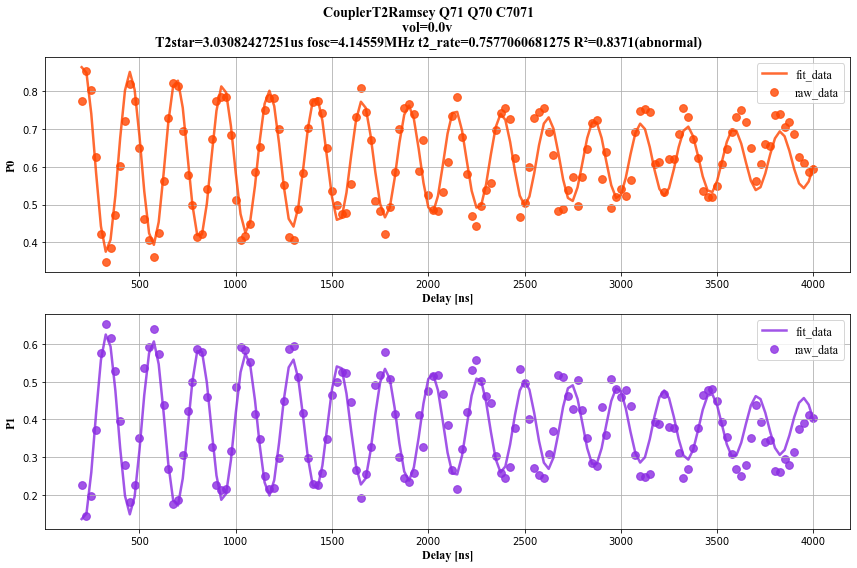

In [16]:
t2_exp.analysis.drawer.figure

#### 更新比特参数

In [176]:
t2_quality = t2_exp.analysis.quality.descriptor
t2 = t2_exp.analysis.results.tau.value * 1e3

if t2_quality == Quality.normal:
    coupler.T2 = t2
    pyqlog.info(f'Update {coupler} T2 {coupler.T2}ns!')
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-11-21 21:35:30 |   INFO   | Update Qubit(bit=70) T2 8051.14619389ns!
2022-11-21 21:35:30 |  UPDATE  | Save q70 to data service success.


### ACSpectrum

In [31]:
ACS_exp = CouplerACSpectrum.from_experiment_context(context)
ACS_exp.set_experiment_options(
    z_amps=qarange(0, 0.08, 0.001),
    delays = qarange(80, 160, 2.5),
    init_fringe = 80,
    osc_freq_limit = 70,
    freq_bound = 3800,
#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)
ACS_exp.child_experiment.set_experiment_options(
    ac_prepare_time=1000,
    is_dynamic=False,
    repeat=700)

ACS_exp.run()

2022-12-06 20:33:35 |   EXP    | z_amp = 0.0v, fringe = 486.66700000000003MHz
2022-12-06 20:33:40 |   EXP    | CouplerRamsey register success, id 638f36a4ade5dab9049b394f
2022-12-06 20:33:40 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-33-35-z_amp=0.0\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:33:59 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 81.16664 | MHz  | R²=0.9647(normal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9647(normal) | 
2022-12-06 20:33:59 |  RESULT  | osc_freq: 81.16664, new f10: 6252.65636
2022-12-06 20:33:59 |   INFO   | z_amp=0.0 qubit freq = 6252.65636MHz
2022-12-06 20:33:59 |   EXP    | z_amp = 0.001v, fringe = 486.66700000000003MHz
2022-12-06 20:34:04 |   EXP    | CouplerRamsey register success, id 638f36bcade5dab9049b397b
2022-12-06 20:34:04 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-33-59-z_amp=0.001\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:34:23 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.35124 | MHz  | R²=0.9174(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9174(abnormal) | 
2022-12-06 20:34:23 |  RESULT  | osc_freq: 80.35124, new f10: 6253.47176
2022-12-06 20:34:23 |   INFO   | z_amp=0.001 qubit freq = 6253.47176MHz
2022-12-06 20:34:23 |   EXP    | z_amp = 0.002v, fringe = 486.66700000000003MHz
2022-12-06 20:34:27 |   EXP    | CouplerRamsey register success, id 638f36d3ade5dab9049b39a7
2022-12-06 20:34:27 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-34-23-z_amp=0.002\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:34:46 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.24535 | MHz  | R²=0.8894(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8894(abnormal) | 
2022-12-06 20:34:46 |  RESULT  | osc_freq: 80.24535, new f10: 6253.57765
2022-12-06 20:34:46 |   INFO   | z_amp=0.002 qubit freq = 6253.57765MHz
2022-12-06 20:34:46 |   EXP    | z_amp = 0.003v, fringe = 487.5159700000013MHz
2022-12-06 20:34:51 |   EXP    | CouplerRamsey register success, id 638f36ebade5dab9049b39d3
2022-12-06 20:34:51 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-34-46-z_amp=0.003\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:35:10 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 81.38457 | MHz  | R²=0.885(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.885(abnormal) | 
2022-12-06 20:35:10 |  RESULT  | osc_freq: 81.38457, new f10: 6251.589459999999
2022-12-06 20:35:10 |   INFO   | z_amp=0.003 qubit freq = 6251.589459999999MHz
2022-12-06 20:35:10 |   EXP    | z_amp = 0.004v, fringe = 492.98281000000316MHz
2022-12-06 20:35:15 |   EXP    | CouplerRamsey register success, id 638f3703ade5dab9049b39ff
2022-12-06 20:35:15 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-35-10-z_amp=0.004\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:36:13 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 76.37387 | MHz  | R²=0.8384(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8384(abnormal) | 
2022-12-06 20:36:13 |  RESULT  | osc_freq: 76.37387, new f10: 6251.133319999997
2022-12-06 20:36:13 |   INFO   | z_amp=0.004 qubit freq = 6251.133319999997MHz
2022-12-06 20:36:13 |   EXP    | z_amp = 0.005v, fringe = 488.28077000000667MHz
2022-12-06 20:36:18 |   EXP    | CouplerRamsey register success, id 638f3742ade5dab9049b3a2b
2022-12-06 20:36:18 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-36-13-z_amp=0.005\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:36:37 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 82.38113 | MHz  | R²=0.8617(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8617(abnormal) | 
2022-12-06 20:36:37 |  RESULT  | osc_freq: 82.38113, new f10: 6249.828099999994
2022-12-06 20:36:37 |   INFO   | z_amp=0.005 qubit freq = 6249.828099999994MHz
2022-12-06 20:36:37 |   EXP    | z_amp = 0.006v, fringe = 492.8162000000102MHz
2022-12-06 20:36:41 |   EXP    | CouplerRamsey register success, id 638f3759ade5dab9049b3a57
2022-12-06 20:36:41 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-36-37-z_amp=0.006\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:38:06 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.21433 | MHz  | R²=0.9033(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9033(abnormal) | 
2022-12-06 20:38:06 |  RESULT  | osc_freq: 80.21433, new f10: 6247.459469999991
2022-12-06 20:38:06 |   INFO   | z_amp=0.006 qubit freq = 6247.459469999991MHz
2022-12-06 20:38:06 |   EXP    | z_amp = 0.007v, fringe = 496.46257000001424MHz
2022-12-06 20:38:10 |   EXP    | CouplerRamsey register success, id 638f37b2ade5dab9049b3a83
2022-12-06 20:38:10 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-38-06-z_amp=0.007\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:38:29 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 78.59832 | MHz  | R²=0.8441(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8441(abnormal) | 
2022-12-06 20:38:29 |  RESULT  | osc_freq: 78.59832, new f10: 6245.429109999986
2022-12-06 20:38:29 |   INFO   | z_amp=0.007 qubit freq = 6245.429109999986MHz
2022-12-06 20:38:29 |   EXP    | z_amp = 0.008v, fringe = 496.7529800000193MHz
2022-12-06 20:38:33 |   EXP    | CouplerRamsey register success, id 638f37c9ade5dab9049b3aaf
2022-12-06 20:38:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-38-29-z_amp=0.008\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:38:52 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.67748 | MHz  | R²=0.8434(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8434(abnormal) | 
2022-12-06 20:38:52 |  RESULT  | osc_freq: 80.67748, new f10: 6243.059539999981
2022-12-06 20:38:52 |   INFO   | z_amp=0.008 qubit freq = 6243.059539999981MHz
2022-12-06 20:38:52 |   EXP    | z_amp = 0.009v, fringe = 500.1392400000259MHz
2022-12-06 20:38:57 |   EXP    | CouplerRamsey register success, id 638f37e1ade5dab9049b3adb
2022-12-06 20:38:57 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-38-52-z_amp=0.009\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:39:16 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |     quality      | 
--------------------------------------------------------------
|   freq    |   fosc    | 79.83278 | MHz  | R²=0.9(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9(abnormal) | 
2022-12-06 20:39:16 |  RESULT  | osc_freq: 79.83278, new f10: 6240.517979999975
2022-12-06 20:39:16 |   INFO   | z_amp=0.009 qubit freq = 6240.517979999975MHz
2022-12-06 20:39:16 |   EXP    | z_amp = 0.01v, fringe = 502.6855700000324MHz
2022-12-06 20:39:20 |   EXP    | CouplerRamsey register success, id 638f37f8ade5dab9049b3b07
2022-12-06 20:39:20 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-39-16-z_amp=0.01\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:39:39 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.77595 | MHz  | R²=0.8323(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8323(abnormal) | 
2022-12-06 20:39:39 |  RESULT  | osc_freq: 80.77595, new f10: 6237.028479999968
2022-12-06 20:39:39 |   INFO   | z_amp=0.01 qubit freq = 6237.028479999968MHz
2022-12-06 20:39:39 |   EXP    | z_amp = 0.011v, fringe = 507.89896000004046MHz
2022-12-06 20:39:44 |   EXP    | CouplerRamsey register success, id 638f3810ade5dab9049b3b33
2022-12-06 20:39:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-39-39-z_amp=0.011\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:40:03 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.65769 | MHz  | R²=0.865(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.865(abnormal) | 
2022-12-06 20:40:03 |  RESULT  | osc_freq: 79.65769, new f10: 6232.93334999996
2022-12-06 20:40:03 |   INFO   | z_amp=0.011 qubit freq = 6232.93334999996MHz
2022-12-06 20:40:03 |   EXP    | z_amp = 0.012v, fringe = 512.2574100000493MHz
2022-12-06 20:40:07 |   EXP    | CouplerRamsey register success, id 638f3827ade5dab9049b3b5f
2022-12-06 20:40:07 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-40-03-z_amp=0.012\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:40:27 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |       quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 78.7139 | MHz  | R²=0.8609(abnormal) | 
| stft_flag | stft_flag |  False  | None | R²=0.8609(abnormal) | 
2022-12-06 20:40:27 |  RESULT  | osc_freq: 78.7139, new f10: 6229.518689999952
2022-12-06 20:40:27 |   INFO   | z_amp=0.012 qubit freq = 6229.518689999952MHz
2022-12-06 20:40:27 |   EXP    | z_amp = 0.013v, fringe = 513.7055000000582MHz
2022-12-06 20:40:31 |   EXP    | CouplerRamsey register success, id 638f383fade5dab9049b3b8b
2022-12-06 20:40:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-40-27-z_amp=0.013\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:40:50 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 81.34737 | MHz  | R²=0.8849(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8849(abnormal) | 
2022-12-06 20:40:50 |  RESULT  | osc_freq: 81.34737, new f10: 6225.437129999942
2022-12-06 20:40:50 |   INFO   | z_amp=0.013 qubit freq = 6225.437129999942MHz
2022-12-06 20:40:50 |   EXP    | z_amp = 0.014v, fringe = 519.8013300000694MHz
2022-12-06 20:40:55 |   EXP    | CouplerRamsey register success, id 638f3857ade5dab9049b3bb7
2022-12-06 20:40:55 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-40-50-z_amp=0.014\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:41:47 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 79.64316 | MHz  | R²=0.8608(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8608(abnormal) | 
2022-12-06 20:41:47 |  RESULT  | osc_freq: 79.64316, new f10: 6221.045509999932
2022-12-06 20:41:47 |   INFO   | z_amp=0.014 qubit freq = 6221.045509999932MHz
2022-12-06 20:41:47 |   EXP    | z_amp = 0.015v, fringe = 524.1461700000809MHz
2022-12-06 20:41:52 |   EXP    | CouplerRamsey register success, id 638f3890ade5dab9049b3be3
2022-12-06 20:41:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-41-47-z_amp=0.015\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:42:11 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.37275 | MHz  | R²=0.8476(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8476(abnormal) | 
2022-12-06 20:42:11 |  RESULT  | osc_freq: 80.37275, new f10: 6215.971079999919
2022-12-06 20:42:11 |   INFO   | z_amp=0.015 qubit freq = 6215.971079999919MHz
2022-12-06 20:42:11 |   EXP    | z_amp = 0.016v, fringe = 530.2761600000958MHz
2022-12-06 20:42:15 |   EXP    | CouplerRamsey register success, id 638f38a7ade5dab9049b3c0f
2022-12-06 20:42:15 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-42-11-z_amp=0.016\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:42:34 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 76.34182 | MHz  | R²=0.7428(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7428(bad) | 
2022-12-06 20:42:34 |  RESULT  | osc_freq: 76.34182, new f10: 6213.872019999905
2022-12-06 20:42:35 |   INFO   | z_amp=0.016 qubit freq = 6213.872019999905MHz
2022-12-06 20:42:35 |   EXP    | z_amp = 0.017v, fringe = 525.7416700001113MHz
2022-12-06 20:42:39 |   EXP    | CouplerRamsey register success, id 638f38bfade5dab9049b3c3b
2022-12-06 20:42:39 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-42-35-z_amp=0.017\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:42:58 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 86.98339 | MHz  | R²=0.5637(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.5637(bad) | 
2022-12-06 20:42:58 |  RESULT  | osc_freq: 86.98339, new f10: 6207.764939999889
2022-12-06 20:42:58 |   INFO   | z_amp=0.017 qubit freq = 6207.764939999889MHz
2022-12-06 20:42:58 |   EXP    | z_amp = 0.018v, fringe = 542.8401600001298MHz
2022-12-06 20:43:03 |   EXP    | CouplerRamsey register success, id 638f38d7ade5dab9049b3c67
2022-12-06 20:43:03 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-42-58-z_amp=0.018\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:43:22 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 84.23878 | MHz  | R²=0.8268(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8268(abnormal) | 
2022-12-06 20:43:22 |  RESULT  | osc_freq: 84.23878, new f10: 6193.411059999871
2022-12-06 20:43:22 |   INFO   | z_amp=0.018 qubit freq = 6193.411059999871MHz
2022-12-06 20:43:22 |   EXP    | z_amp = 0.019v, fringe = 569.679620000149MHz
2022-12-06 20:43:26 |   EXP    | CouplerRamsey register success, id 638f38eeade5dab9049b3c93
2022-12-06 20:43:26 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-43-22-z_amp=0.019\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:43:45 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 64.74284 | MHz  | R²=0.8004(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.8004(bad) | 
2022-12-06 20:43:45 |  RESULT  | osc_freq: 64.74284, new f10: 6186.067539999852
2022-12-06 20:43:45 |   INFO   | z_amp=0.019 qubit freq = 6186.067539999852MHz
2022-12-06 20:43:45 |   EXP    | z_amp = 0.02v, fringe = 554.7556200001691MHz
2022-12-06 20:43:50 |   EXP    | CouplerRamsey register success, id 638f3906ade5dab9049b3cbf
2022-12-06 20:43:50 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-43-45-z_amp=0.02\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:44:41 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 83.96879 | MHz  | R²=0.9437(normal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9437(normal) | 
2022-12-06 20:44:41 |  RESULT  | osc_freq: 83.96879, new f10: 6181.765589999832
2022-12-06 20:44:41 |   INFO   | z_amp=0.02 qubit freq = 6181.765589999832MHz
2022-12-06 20:44:41 |   EXP    | z_amp = 0.021v, fringe = 559.9847900001896MHz
2022-12-06 20:44:45 |   EXP    | CouplerRamsey register success, id 638f393dade5dab9049b3ceb
2022-12-06 20:44:45 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-44-41-z_amp=0.021\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:45:04 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 86.23017 | MHz  | R²=0.8609(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8609(abnormal) | 
2022-12-06 20:45:04 |  RESULT  | osc_freq: 86.23017, new f10: 6174.275039999811
2022-12-06 20:45:04 |   INFO   | z_amp=0.021 qubit freq = 6174.275039999811MHz
2022-12-06 20:45:04 |   EXP    | z_amp = 0.022v, fringe = 576.8941100002112MHz
2022-12-06 20:45:09 |   EXP    | CouplerRamsey register success, id 638f3955ade5dab9049b3d17
2022-12-06 20:45:09 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-45-04-z_amp=0.022\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:45:28 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 77.64868 | MHz  | R²=0.8413(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8413(abnormal) | 
2022-12-06 20:45:28 |  RESULT  | osc_freq: 77.64868, new f10: 6165.947209999789
2022-12-06 20:45:28 |   INFO   | z_amp=0.022 qubit freq = 6165.947209999789MHz
2022-12-06 20:45:28 |   EXP    | z_amp = 0.023v, fringe = 583.7079000002341MHz
2022-12-06 20:45:33 |   EXP    | CouplerRamsey register success, id 638f396dade5dab9049b3d43
2022-12-06 20:45:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-45-28-z_amp=0.023\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:45:52 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 77.96497 | MHz  | R²=0.9076(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9076(abnormal) | 
2022-12-06 20:45:52 |  RESULT  | osc_freq: 77.96497, new f10: 6158.817129999767
2022-12-06 20:45:52 |   INFO   | z_amp=0.023 qubit freq = 6158.817129999767MHz
2022-12-06 20:45:52 |   EXP    | z_amp = 0.024v, fringe = 587.6052000002574MHz
2022-12-06 20:45:56 |   EXP    | CouplerRamsey register success, id 638f3984ade5dab9049b3d6f
2022-12-06 20:45:56 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-45-52-z_amp=0.024\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:46:15 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 83.39529 | MHz  | R²=0.9069(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9069(abnormal) | 
2022-12-06 20:46:15 |  RESULT  | osc_freq: 83.39529, new f10: 6149.489509999743
2022-12-06 20:46:15 |   INFO   | z_amp=0.024 qubit freq = 6149.489509999743MHz
2022-12-06 20:46:15 |   EXP    | z_amp = 0.025v, fringe = 602.5256500002824MHz
2022-12-06 20:46:20 |   EXP    | CouplerRamsey register success, id 638f399cade5dab9049b3d9b
2022-12-06 20:46:20 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-46-15-z_amp=0.025\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:46:39 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 77.06463 | MHz  | R²=0.8741(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8741(abnormal) | 
2022-12-06 20:46:39 |  RESULT  | osc_freq: 77.06463, new f10: 6140.899719999718
2022-12-06 20:46:39 |   INFO   | z_amp=0.025 qubit freq = 6140.899719999718MHz
2022-12-06 20:46:39 |   EXP    | z_amp = 0.026v, fringe = 607.4422400003068MHz
2022-12-06 20:46:43 |   EXP    | CouplerRamsey register success, id 638f39b3ade5dab9049b3dc7
2022-12-06 20:46:43 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-46-39-z_amp=0.026\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:47:02 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 78.74475 | MHz  | R²=0.9028(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9028(abnormal) | 
2022-12-06 20:47:02 |  RESULT  | osc_freq: 78.74475, new f10: 6134.303009999694
2022-12-06 20:47:02 |   INFO   | z_amp=0.026 qubit freq = 6134.303009999694MHz
2022-12-06 20:47:02 |   EXP    | z_amp = 0.027v, fringe = 610.7906200003317MHz
2022-12-06 20:47:07 |   EXP    | CouplerRamsey register success, id 638f39cbade5dab9049b3df3
2022-12-06 20:47:07 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-47-02-z_amp=0.027\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:47:26 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 87.95646 | MHz  | R²=0.9094(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9094(abnormal) | 
2022-12-06 20:47:26 |  RESULT  | osc_freq: 87.95646, new f10: 6121.742919999669
2022-12-06 20:47:26 |   INFO   | z_amp=0.027 qubit freq = 6121.742919999669MHz
2022-12-06 20:47:26 |   EXP    | z_amp = 0.028v, fringe = 637.2705500003585MHz
2022-12-06 20:47:30 |   EXP    | CouplerRamsey register success, id 638f39e2ade5dab9049b3e1f
2022-12-06 20:47:30 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-47-26-z_amp=0.028\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:47:49 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 72.89406 | MHz  | R²=0.8737(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8737(abnormal) | 
2022-12-06 20:47:49 |  RESULT  | osc_freq: 72.89406, new f10: 6110.3253899996425
2022-12-06 20:47:49 |   INFO   | z_amp=0.028 qubit freq = 6110.3253899996425MHz
2022-12-06 20:47:49 |   EXP    | z_amp = 0.029v, fringe = 640.4395800003858MHz
2022-12-06 20:47:54 |   EXP    | CouplerRamsey register success, id 638f39faade5dab9049b3e4b
2022-12-06 20:47:54 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-47-49-z_amp=0.029\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:48:13 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |       quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.8288 | MHz  | R²=0.9004(abnormal) | 
| stft_flag | stft_flag |  True   | None | R²=0.9004(abnormal) | 
2022-12-06 20:48:14 |  RESULT  | osc_freq: 79.8288, new f10: 6100.221619999615
2022-12-06 20:48:14 |   INFO   | z_amp=0.029 qubit freq = 6100.221619999615MHz
2022-12-06 20:48:14 |   EXP    | z_amp = 0.03v, fringe = 649.0583900004158MHz
2022-12-06 20:48:18 |   EXP    | CouplerRamsey register success, id 638f3a12ade5dab9049b3e77
2022-12-06 20:48:18 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-48-14-z_amp=0.03\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:48:37 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 81.45877 | MHz  | R²=0.8264(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8264(abnormal) | 
2022-12-06 20:48:37 |  RESULT  | osc_freq: 81.45877, new f10: 6089.972839999585
2022-12-06 20:48:37 |   INFO   | z_amp=0.03 qubit freq = 6089.972839999585MHz
2022-12-06 20:48:37 |   EXP    | z_amp = 0.031v, fringe = 660.9109500004479MHz
2022-12-06 20:48:42 |   EXP    | CouplerRamsey register success, id 638f3a2aade5dab9049b3ea3
2022-12-06 20:48:42 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-48-37-z_amp=0.031\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:49:01 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |       quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 77.7189 | MHz  | R²=0.8829(abnormal) | 
| stft_flag | stft_flag |  True   | None | R²=0.8829(abnormal) | 
2022-12-06 20:49:01 |  RESULT  | osc_freq: 77.7189, new f10: 6081.860149999553
2022-12-06 20:49:01 |   INFO   | z_amp=0.031 qubit freq = 6081.860149999553MHz
2022-12-06 20:49:01 |   EXP    | z_amp = 0.032v, fringe = 664.6064500004813MHz
2022-12-06 20:49:05 |   EXP    | CouplerRamsey register success, id 638f3a41ade5dab9049b3ecf
2022-12-06 20:49:05 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-49-01-z_amp=0.032\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:49:24 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |       quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 90.1011 | MHz  | R²=0.8323(abnormal) | 
| stft_flag | stft_flag |  True   | None | R²=0.8323(abnormal) | 
2022-12-06 20:49:24 |  RESULT  | osc_freq: 90.1011, new f10: 6065.7824499995195
2022-12-06 20:49:24 |   INFO   | z_amp=0.032 qubit freq = 6065.7824499995195MHz
2022-12-06 20:49:24 |   EXP    | z_amp = 0.033v, fringe = 698.7502600005182MHz
2022-12-06 20:49:29 |   EXP    | CouplerRamsey register success, id 638f3a59ade5dab9049b3efb
2022-12-06 20:49:29 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-49-24-z_amp=0.033\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:49:48 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 63.94621 | MHz  | R²=0.8848(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8848(abnormal) | 
2022-12-06 20:49:48 |  RESULT  | osc_freq: 63.94621, new f10: 6057.793529999482
2022-12-06 20:49:48 |   INFO   | z_amp=0.033 qubit freq = 6057.793529999482MHz
2022-12-06 20:49:48 |   EXP    | z_amp = 0.034v, fringe = 682.5966100005608MHz
2022-12-06 20:49:53 |   EXP    | CouplerRamsey register success, id 638f3a71ade5dab9049b3f27
2022-12-06 20:49:53 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-49-48-z_amp=0.034\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:50:12 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |       quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 93.6996 | MHz  | R²=0.8537(abnormal) | 
| stft_flag | stft_flag |  True   | None | R²=0.8537(abnormal) | 
2022-12-06 20:50:12 |  RESULT  | osc_freq: 93.6996, new f10: 6044.19378999944
2022-12-06 20:50:12 |   INFO   | z_amp=0.034 qubit freq = 6044.19378999944MHz
2022-12-06 20:50:12 |   EXP    | z_amp = 0.035v, fringe = 715.5067700006102MHz
2022-12-06 20:50:16 |   EXP    | CouplerRamsey register success, id 638f3a88ade5dab9049b3f53
2022-12-06 20:50:16 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-50-12-z_amp=0.035\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:50:35 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 74.54035 | MHz  | R²=0.7799(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7799(bad) | 
2022-12-06 20:50:35 |  RESULT  | osc_freq: 74.54035, new f10: 6030.44287999939
2022-12-06 20:50:35 |   INFO   | z_amp=0.035 qubit freq = 6030.44287999939MHz
2022-12-06 20:50:35 |   EXP    | z_amp = 0.036v, fringe = 723.9492000006685MHz
2022-12-06 20:50:40 |   EXP    | CouplerRamsey register success, id 638f3aa0ade5dab9049b3f7f
2022-12-06 20:50:40 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-50-35-z_amp=0.036\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:50:59 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 74.31846 | MHz  | R²=0.7179(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7179(bad) | 
2022-12-06 20:50:59 |  RESULT  | osc_freq: 74.31846, new f10: 6022.222339999332
2022-12-06 20:50:59 |   INFO   | z_amp=0.036 qubit freq = 6022.222339999332MHz
2022-12-06 20:50:59 |   EXP    | z_amp = 0.037v, fringe = 720.9578300007379MHz
2022-12-06 20:51:03 |   EXP    | CouplerRamsey register success, id 638f3ab7ade5dab9049b3fab
2022-12-06 20:51:03 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-50-59-z_amp=0.037\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:51:22 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 86.56208 | MHz  | R²=0.4238(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.4238(bad) | 
2022-12-06 20:51:22 |  RESULT  | osc_freq: 86.56208, new f10: 6012.970089999263
2022-12-06 20:51:22 |   INFO   | z_amp=0.037 qubit freq = 6012.970089999263MHz
2022-12-06 20:51:22 |   EXP    | z_amp = 0.038v, fringe = 737.8038700008165MHz
2022-12-06 20:51:27 |   EXP    | CouplerRamsey register success, id 638f3aceade5dab9049b3fd7
2022-12-06 20:51:27 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-51-22-z_amp=0.038\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:51:46 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |    quality     | 
-------------------------------------------------------------
|   freq    |   fosc    | 106.79847 | MHz  | R²=0.3093(bad) | 
| stft_flag | stft_flag |   False   | None | R²=0.3093(bad) | 
2022-12-06 20:51:46 |  RESULT  | osc_freq: 106.79847, new f10: 5975.8876599991845
2022-12-06 20:51:46 |   INFO   | z_amp=0.038 qubit freq = 5975.8876599991845MHz
2022-12-06 20:51:46 |   EXP    | z_amp = 0.039v, fringe = 829.5149500009002MHz
2022-12-06 20:51:50 |   EXP    | CouplerRamsey register success, id 638f3ae6ade5dab9049b4003
2022-12-06 20:51:50 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-51-46-z_amp=0.039\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:52:09 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 27.08744 | MHz  | R²=0.7717(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7717(bad) | 
2022-12-06 20:52:09 |  RESULT  | osc_freq: 27.08744, new f10: 5963.8876099991
2022-12-06 20:52:09 |   INFO   | z_amp=0.039 qubit freq = 5963.8876099991MHz
2022-12-06 20:52:09 |   EXP    | z_amp = 0.04v, fringe = 763.5200600009875MHz
2022-12-06 20:52:13 |   EXP    | CouplerRamsey register success, id 638f3afdade5dab9049b402f
2022-12-06 20:52:13 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-52-09-z_amp=0.04\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:52:32 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |    quality     | 
-------------------------------------------------------------
|   freq    |   fosc    | 106.43522 | MHz  | R²=0.7902(bad) | 
| stft_flag | stft_flag |   True    | None | R²=0.7902(bad) | 
2022-12-06 20:52:32 |  RESULT  | osc_freq: 106.43522, new f10: 5950.534719999013
2022-12-06 20:52:32 |   INFO   | z_amp=0.04 qubit freq = 5950.534719999013MHz
2022-12-06 20:52:32 |   EXP    | z_amp = 0.041v, fringe = 804.6610100010785MHz
2022-12-06 20:52:37 |   EXP    | CouplerRamsey register success, id 638f3b15ade5dab9049b405b
2022-12-06 20:52:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-52-32-z_amp=0.041\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:52:56 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 83.81323 | MHz  | R²=0.6451(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.6451(bad) | 
2022-12-06 20:52:56 |  RESULT  | osc_freq: 83.81323, new f10: 5932.0157599989225
2022-12-06 20:52:56 |   INFO   | z_amp=0.041 qubit freq = 5932.0157599989225MHz
2022-12-06 20:52:56 |   EXP    | z_amp = 0.042v, fringe = 832.1592700011724MHz
2022-12-06 20:53:00 |   EXP    | CouplerRamsey register success, id 638f3b2cade5dab9049b4087
2022-12-06 20:53:00 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-52-56-z_amp=0.042\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:53:19 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 65.43177 | MHz  | R²=0.7968(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7968(bad) | 
2022-12-06 20:53:19 |  RESULT  | osc_freq: 65.43177, new f10: 5922.898959998828
2022-12-06 20:53:19 |   INFO   | z_amp=0.042 qubit freq = 5922.898959998828MHz
2022-12-06 20:53:19 |   EXP    | z_amp = 0.043v, fringe = 817.30568000127MHz
2022-12-06 20:53:24 |   EXP    | CouplerRamsey register success, id 638f3b43ade5dab9049b40b3
2022-12-06 20:53:24 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-53-19-z_amp=0.043\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:53:42 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 98.42526 | MHz  | R²=0.8238(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8238(abnormal) | 
2022-12-06 20:53:43 |  RESULT  | osc_freq: 98.42526, new f10: 5904.759059998731
2022-12-06 20:53:43 |   INFO   | z_amp=0.043 qubit freq = 5904.759059998731MHz
2022-12-06 20:53:43 |   EXP    | z_amp = 0.044v, fringe = 862.8939400013696MHz
2022-12-06 20:53:47 |   EXP    | CouplerRamsey register success, id 638f3b5bade5dab9049b40df
2022-12-06 20:53:47 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-53-43-z_amp=0.044\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:54:06 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 70.87336 | MHz  | R²=0.8149(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8149(abnormal) | 
2022-12-06 20:54:06 |  RESULT  | osc_freq: 70.87336, new f10: 5886.7226999986315
2022-12-06 20:54:06 |   INFO   | z_amp=0.044 qubit freq = 5886.7226999986315MHz
2022-12-06 20:54:06 |   EXP    | z_amp = 0.045v, fringe = 871.7001200014702MHz
2022-12-06 20:54:10 |   EXP    | CouplerRamsey register success, id 638f3b72ade5dab9049b410b
2022-12-06 20:54:10 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-54-06-z_amp=0.045\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:54:29 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 72.03567 | MHz  | R²=0.8509(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8509(abnormal) | 
2022-12-06 20:54:29 |  RESULT  | osc_freq: 72.03567, new f10: 5876.75420999853
2022-12-06 20:54:29 |   INFO   | z_amp=0.045 qubit freq = 5876.75420999853MHz
2022-12-06 20:54:29 |   EXP    | z_amp = 0.046v, fringe = 865.6364100015753MHz
2022-12-06 20:54:33 |   EXP    | CouplerRamsey register success, id 638f3b89ade5dab9049b4137
2022-12-06 20:54:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-54-29-z_amp=0.046\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:54:52 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |    quality     | 
-------------------------------------------------------------
|   freq    |   fosc    | 106.39184 | MHz  | R²=0.3854(bad) | 
| stft_flag | stft_flag |   False   | None | R²=0.3854(bad) | 
2022-12-06 20:54:52 |  RESULT  | osc_freq: 106.39184, new f10: 5848.461749998425
2022-12-06 20:54:52 |   INFO   | z_amp=0.046 qubit freq = 5848.461749998425MHz
2022-12-06 20:54:53 |   EXP    | z_amp = 0.047v, fringe = 938.6446800016811MHz
2022-12-06 20:54:57 |   EXP    | CouplerRamsey register success, id 638f3ba1ade5dab9049b4163
2022-12-06 20:54:57 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-54-53-z_amp=0.047\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:55:16 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 45.13246 | MHz  | R²=0.7933(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7933(bad) | 
2022-12-06 20:55:16 |  RESULT  | osc_freq: 45.13246, new f10: 5836.71285999832
2022-12-06 20:55:16 |   INFO   | z_amp=0.047 qubit freq = 5836.71285999832MHz
2022-12-06 20:55:16 |   EXP    | z_amp = 0.048v, fringe = 898.9824600017919MHz
2022-12-06 20:55:20 |   EXP    | CouplerRamsey register success, id 638f3bb8ade5dab9049b418f
2022-12-06 20:55:20 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-55-16-z_amp=0.048\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:55:39 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |       quality       | 
------------------------------------------------------------------
|   freq    |   fosc    | 100.99352 | MHz  | R²=0.8285(abnormal) | 
| stft_flag | stft_flag |   True    | None | R²=0.8285(abnormal) | 
2022-12-06 20:55:39 |  RESULT  | osc_freq: 100.99352, new f10: 5820.514019998209
2022-12-06 20:55:39 |   INFO   | z_amp=0.048 qubit freq = 5820.514019998209MHz
2022-12-06 20:55:39 |   EXP    | z_amp = 0.049v, fringe = 940.6247700019085MHz
2022-12-06 20:55:44 |   EXP    | CouplerRamsey register success, id 638f3bd0ade5dab9049b41bb
2022-12-06 20:55:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-55-39-z_amp=0.049\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:56:03 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 77.99948 | MHz  | R²=0.7063(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.7063(bad) | 
2022-12-06 20:56:03 |  RESULT  | osc_freq: 77.99948, new f10: 5801.865749998092
2022-12-06 20:56:03 |   INFO   | z_amp=0.049 qubit freq = 5801.865749998092MHz
2022-12-06 20:56:03 |   EXP    | z_amp = 0.05v, fringe = 959.721950002031MHz
2022-12-06 20:56:07 |   EXP    | CouplerRamsey register success, id 638f3be7ade5dab9049b41e7
2022-12-06 20:56:07 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-56-03-z_amp=0.05\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:56:26 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 80.80518 | MHz  | R²=0.7468(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7468(bad) | 
2022-12-06 20:56:26 |  RESULT  | osc_freq: 80.80518, new f10: 5779.962869997969
2022-12-06 20:56:26 |   INFO   | z_amp=0.05 qubit freq = 5779.962869997969MHz
2022-12-06 20:56:26 |   EXP    | z_amp = 0.051v, fringe = 985.6846200021573MHz
2022-12-06 20:56:31 |   EXP    | CouplerRamsey register success, id 638f3bffade5dab9049b4213
2022-12-06 20:56:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-56-26-z_amp=0.051\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:56:50 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 68.53829 | MHz  | R²=0.8649(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8649(abnormal) | 
2022-12-06 20:56:50 |  RESULT  | osc_freq: 68.53829, new f10: 5766.267089997843
2022-12-06 20:56:50 |   INFO   | z_amp=0.051 qubit freq = 5766.267089997843MHz
2022-12-06 20:56:50 |   EXP    | z_amp = 0.052v, fringe = 979.7115900022845MHz
2022-12-06 20:56:54 |   EXP    | CouplerRamsey register success, id 638f3c16ade5dab9049b423f
2022-12-06 20:56:54 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-56-50-z_amp=0.052\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:57:13 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 97.43637 | MHz  | R²=0.8701(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8701(abnormal) | 
2022-12-06 20:57:13 |  RESULT  | osc_freq: 97.43637, new f10: 5743.342039997716
2022-12-06 20:57:13 |   INFO   | z_amp=0.052 qubit freq = 5743.342039997716MHz
2022-12-06 20:57:13 |   EXP    | z_amp = 0.053v, fringe = 1029.3022800024119MHz
2022-12-06 20:57:17 |   EXP    | CouplerRamsey register success, id 638f3c2dade5dab9049b426b
2022-12-06 20:57:17 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-57-13-z_amp=0.053\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:57:36 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 68.44514 | MHz  | R²=0.8419(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8419(abnormal) | 
2022-12-06 20:57:36 |  RESULT  | osc_freq: 68.44514, new f10: 5722.742579997589
2022-12-06 20:57:36 |   INFO   | z_amp=0.053 qubit freq = 5722.742579997589MHz
2022-12-06 20:57:36 |   EXP    | z_amp = 0.054v, fringe = 1036.021290002539MHz
2022-12-06 20:57:41 |   EXP    | CouplerRamsey register success, id 638f3c45ade5dab9049b4297
2022-12-06 20:57:41 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-57-36-z_amp=0.054\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:58:00 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 83.22904 | MHz  | R²=0.7537(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7537(bad) | 
2022-12-06 20:58:00 |  RESULT  | osc_freq: 83.22904, new f10: 5701.2396699974615
2022-12-06 20:58:00 |   INFO   | z_amp=0.054 qubit freq = 5701.2396699974615MHz
2022-12-06 20:58:00 |   EXP    | z_amp = 0.055v, fringe = 1061.6566900026664MHz
2022-12-06 20:58:04 |   EXP    | CouplerRamsey register success, id 638f3c5cade5dab9049b42c3
2022-12-06 20:58:04 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-58-00-z_amp=0.055\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:58:23 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 81.33463 | MHz  | R²=0.7265(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7265(bad) | 
2022-12-06 20:58:23 |  RESULT  | osc_freq: 81.33463, new f10: 5677.498679997334
2022-12-06 20:58:23 |   INFO   | z_amp=0.055 qubit freq = 5677.498679997334MHz
2022-12-06 20:58:23 |   EXP    | z_amp = 0.056v, fringe = 1088.9703900027953MHz
2022-12-06 20:58:27 |   EXP    | CouplerRamsey register success, id 638f3c73ade5dab9049b42ef
2022-12-06 20:58:27 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-58-23-z_amp=0.056\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:58:46 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 66.38153 | MHz  | R²=0.7766(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.7766(bad) | 
2022-12-06 20:58:46 |  RESULT  | osc_freq: 66.38153, new f10: 5665.138079997206
2022-12-06 20:58:46 |   INFO   | z_amp=0.056 qubit freq = 5665.138079997206MHz
2022-12-06 20:58:46 |   EXP    | z_amp = 0.057v, fringe = 1076.3321300029265MHz
2022-12-06 20:58:51 |   EXP    | CouplerRamsey register success, id 638f3c8bade5dab9049b431b
2022-12-06 20:58:51 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-58-46-z_amp=0.057\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:59:10 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |       quality       | 
------------------------------------------------------------------
|   freq    |   fosc    | 105.98718 | MHz  | R²=0.8668(abnormal) | 
| stft_flag | stft_flag |   True    | None | R²=0.8668(abnormal) | 
2022-12-06 20:59:10 |  RESULT  | osc_freq: 105.98718, new f10: 5638.170689997074
2022-12-06 20:59:10 |   INFO   | z_amp=0.057 qubit freq = 5638.170689997074MHz
2022-12-06 20:59:10 |   EXP    | z_amp = 0.058v, fringe = 1143.89349000307MHz
2022-12-06 20:59:14 |   EXP    | CouplerRamsey register success, id 638f3ca2ade5dab9049b4347
2022-12-06 20:59:14 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-59-10-z_amp=0.058\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:59:33 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 58.08935 | MHz  | R²=0.6989(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.6989(bad) | 
2022-12-06 20:59:33 |  RESULT  | osc_freq: 58.08935, new f10: 5618.507159996931
2022-12-06 20:59:33 |   INFO   | z_amp=0.058 qubit freq = 5618.507159996931MHz
2022-12-06 20:59:33 |   EXP    | z_amp = 0.059v, fringe = 1134.3425100032227MHz
2022-12-06 20:59:37 |   EXP    | CouplerRamsey register success, id 638f3cb9ade5dab9049b4373
2022-12-06 20:59:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-59-33-z_amp=0.059\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 20:59:56 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 93.11493 | MHz  | R²=0.8967(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.8967(abnormal) | 
2022-12-06 20:59:56 |  RESULT  | osc_freq: 93.11493, new f10: 5593.032559996778
2022-12-06 20:59:56 |   INFO   | z_amp=0.059 qubit freq = 5593.032559996778MHz
2022-12-06 20:59:56 |   EXP    | z_amp = 0.06v, fringe = 1178.7431100033818MHz
2022-12-06 21:00:01 |   EXP    | CouplerRamsey register success, id 638f3cd1ade5dab9049b439f
2022-12-06 21:00:01 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\20-59-56-z_amp=0.06\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:00:20 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 74.19201 | MHz  | R²=0.6307(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.6307(bad) | 
2022-12-06 21:00:20 |  RESULT  | osc_freq: 74.19201, new f10: 5567.554879996619
2022-12-06 21:00:20 |   INFO   | z_amp=0.06 qubit freq = 5567.554879996619MHz
2022-12-06 21:00:20 |   EXP    | z_amp = 0.061v, fringe = 1198.4158800035466MHz
2022-12-06 21:00:24 |   EXP    | CouplerRamsey register success, id 638f3ce8ade5dab9049b43cb
2022-12-06 21:00:24 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-00-20-z_amp=0.061\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:00:43 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 81.24377 | MHz  | R²=0.3325(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.3325(bad) | 
2022-12-06 21:00:43 |  RESULT  | osc_freq: 81.24377, new f10: 5540.830349996454
2022-12-06 21:00:43 |   INFO   | z_amp=0.061 qubit freq = 5540.830349996454MHz
2022-12-06 21:00:43 |   EXP    | z_amp = 0.062v, fringe = 1227.6310300037167MHz
2022-12-06 21:00:48 |   EXP    | CouplerRamsey register success, id 638f3cffade5dab9049b43f7
2022-12-06 21:00:48 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-00-43-z_amp=0.062\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:01:07 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |   quality    | 
----------------------------------------------------------
|   freq    |   fosc    | 71.50788 | MHz  | R²=0.65(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.65(bad) | 
2022-12-06 21:01:07 |  RESULT  | osc_freq: 71.50788, new f10: 5521.351089996284
2022-12-06 21:01:07 |   INFO   | z_amp=0.062 qubit freq = 5521.351089996284MHz
2022-12-06 21:01:07 |   EXP    | z_amp = 0.063v, fringe = 1231.3729000038866MHz
2022-12-06 21:01:11 |   EXP    | CouplerRamsey register success, id 638f3d17ade5dab9049b4423
2022-12-06 21:01:11 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-01-07-z_amp=0.063\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:01:30 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 85.14891 | MHz  | R²=0.7053(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7053(bad) | 
2022-12-06 21:01:30 |  RESULT  | osc_freq: 85.14891, new f10: 5503.968189996114
2022-12-06 21:01:30 |   INFO   | z_amp=0.063 qubit freq = 5503.968189996114MHz
2022-12-06 21:01:30 |   EXP    | z_amp = 0.064v, fringe = 1251.8083500040566MHz
2022-12-06 21:01:35 |   EXP    | CouplerRamsey register success, id 638f3d2fade5dab9049b444f
2022-12-06 21:01:35 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-01-30-z_amp=0.064\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:01:54 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 89.61185 | MHz  | R²=0.6013(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.6013(bad) | 
2022-12-06 21:01:54 |  RESULT  | osc_freq: 89.61185, new f10: 5479.069799995944
2022-12-06 21:01:54 |   INFO   | z_amp=0.064 qubit freq = 5479.069799995944MHz
2022-12-06 21:01:54 |   EXP    | z_amp = 0.065v, fringe = 1293.8340800042397MHz
2022-12-06 21:01:58 |   EXP    | CouplerRamsey register success, id 638f3d46ade5dab9049b447b
2022-12-06 21:01:58 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-01-54-z_amp=0.065\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:02:17 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 71.97207 | MHz  | R²=0.7134(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7134(bad) | 
2022-12-06 21:02:17 |  RESULT  | osc_freq: 71.97207, new f10: 5454.683849995761
2022-12-06 21:02:17 |   INFO   | z_amp=0.065 qubit freq = 5454.683849995761MHz
2022-12-06 21:02:17 |   EXP    | z_amp = 0.066v, fringe = 1309.6796600044354MHz
2022-12-06 21:02:22 |   EXP    | CouplerRamsey register success, id 638f3d5eade5dab9049b44a7
2022-12-06 21:02:22 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-02-17-z_amp=0.066\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:02:41 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |    quality     | 
-----------------------------------------------------------
|   freq    |   fosc    | 87.8966 | MHz  | R²=0.6433(bad) | 
| stft_flag | stft_flag |  True   | None | R²=0.6433(bad) | 
2022-12-06 21:02:41 |  RESULT  | osc_freq: 87.8966, new f10: 5422.913739995565
2022-12-06 21:02:41 |   INFO   | z_amp=0.066 qubit freq = 5422.913739995565MHz
2022-12-06 21:02:41 |   EXP    | z_amp = 0.067v, fringe = 1356.7305300046455MHz
2022-12-06 21:02:46 |   EXP    | CouplerRamsey register success, id 638f3d76ade5dab9049b44d3
2022-12-06 21:02:46 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-02-41-z_amp=0.067\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:03:05 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 64.11866 | MHz  | R²=0.6422(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.6422(bad) | 
2022-12-06 21:03:06 |  RESULT  | osc_freq: 64.11866, new f10: 5399.640809995355
2022-12-06 21:03:06 |   INFO   | z_amp=0.067 qubit freq = 5399.640809995355MHz
2022-12-06 21:03:06 |   EXP    | z_amp = 0.068v, fringe = 1355.6249400048719MHz
2022-12-06 21:03:10 |   EXP    | CouplerRamsey register success, id 638f3d8eade5dab9049b44ff
2022-12-06 21:03:10 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-03-06-z_amp=0.068\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:04:09 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 93.96793 | MHz  | R²=0.5409(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.5409(bad) | 
2022-12-06 21:04:09 |  RESULT  | osc_freq: 93.96793, new f10: 5370.897129995129
2022-12-06 21:04:09 |   INFO   | z_amp=0.068 qubit freq = 5370.897129995129MHz
2022-12-06 21:04:09 |   EXP    | z_amp = 0.069v, fringe = 1403.80730000511MHz
2022-12-06 21:04:13 |   EXP    | CouplerRamsey register success, id 638f3dcdade5dab9049b452b
2022-12-06 21:04:13 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-04-09-z_amp=0.069\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:04:32 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 64.14225 | MHz  | R²=0.7242(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7242(bad) | 
2022-12-06 21:04:32 |  RESULT  | osc_freq: 64.14225, new f10: 5352.540449994891
2022-12-06 21:04:32 |   INFO   | z_amp=0.069 qubit freq = 5352.540449994891MHz
2022-12-06 21:04:32 |   EXP    | z_amp = 0.07v, fringe = 1395.919230005361MHz
2022-12-06 21:04:37 |   EXP    | CouplerRamsey register success, id 638f3de5ade5dab9049b4557
2022-12-06 21:04:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-04-32-z_amp=0.07\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:04:56 |  RESULT  | Experiment results as follow:
|   name    | describe  |   value   | unit |    quality     | 
-------------------------------------------------------------
|   freq    |   fosc    | 100.70333 | MHz  | R²=0.6814(bad) | 
| stft_flag | stft_flag |   True    | None | R²=0.6814(bad) | 
2022-12-06 21:04:56 |  RESULT  | osc_freq: 100.70333, new f10: 5323.867439994639
2022-12-06 21:04:56 |   INFO   | z_amp=0.07 qubit freq = 5323.867439994639MHz
2022-12-06 21:04:56 |   EXP    | z_amp = 0.071v, fringe = 1455.6119000056233MHz
2022-12-06 21:05:00 |   EXP    | CouplerRamsey register success, id 638f3dfcade5dab9049b4583
2022-12-06 21:05:00 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-04-56-z_amp=0.071\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:05:19 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 77.77972 | MHz  | R²=0.5382(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.5382(bad) | 
2022-12-06 21:05:19 |  RESULT  | osc_freq: 77.77972, new f10: 5287.098379994377
2022-12-06 21:05:19 |   INFO   | z_amp=0.071 qubit freq = 5287.098379994377MHz
2022-12-06 21:05:19 |   EXP    | z_amp = 0.072v, fringe = 1498.25673000589MHz
2022-12-06 21:05:24 |   EXP    | CouplerRamsey register success, id 638f3e14ade5dab9049b45af
2022-12-06 21:05:24 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-05-19-z_amp=0.072\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:05:43 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 57.42667 | MHz  | R²=0.7902(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7902(bad) | 
2022-12-06 21:05:43 |  RESULT  | osc_freq: 57.42667, new f10: 5264.806599994111
2022-12-06 21:05:43 |   INFO   | z_amp=0.072 qubit freq = 5264.806599994111MHz
2022-12-06 21:05:43 |   EXP    | z_amp = 0.073v, fringe = 1483.4979000061458MHz
2022-12-06 21:05:47 |   EXP    | CouplerRamsey register success, id 638f3e2bade5dab9049b45db
2022-12-06 21:05:47 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-05-43-z_amp=0.073\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:06:06 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 98.32644 | MHz  | R²=0.6579(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.6579(bad) | 
2022-12-06 21:06:06 |  RESULT  | osc_freq: 98.32644, new f10: 5238.665659993855
2022-12-06 21:06:06 |   INFO   | z_amp=0.073 qubit freq = 5238.665659993855MHz
2022-12-06 21:06:06 |   EXP    | z_amp = 0.074v, fringe = 1531.8144400063893MHz
2022-12-06 21:06:11 |   EXP    | CouplerRamsey register success, id 638f3e42ade5dab9049b4607
2022-12-06 21:06:11 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-06-06-z_amp=0.074\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:06:30 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 69.20465 | MHz  | R²=0.5051(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.5051(bad) | 
2022-12-06 21:06:30 |  RESULT  | osc_freq: 69.20465, new f10: 5219.470909993612
2022-12-06 21:06:30 |   INFO   | z_amp=0.074 qubit freq = 5219.470909993612MHz
2022-12-06 21:06:30 |   EXP    | z_amp = 0.075v, fringe = 1533.2676500066182MHz
2022-12-06 21:06:34 |   EXP    | CouplerRamsey register success, id 638f3e5aade5dab9049b4633
2022-12-06 21:06:34 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-06-30-z_amp=0.075\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:06:53 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 99.54362 | MHz  | R²=0.7497(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7497(bad) | 
2022-12-06 21:06:53 |  RESULT  | osc_freq: 99.54362, new f10: 5187.678729993382
2022-12-06 21:06:53 |   INFO   | z_amp=0.075 qubit freq = 5187.678729993382MHz
2022-12-06 21:06:53 |   EXP    | z_amp = 0.076v, fringe = 1597.2008800068352MHz
2022-12-06 21:06:57 |   EXP    | CouplerRamsey register success, id 638f3e71ade5dab9049b465f
2022-12-06 21:06:57 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-06-53-z_amp=0.076\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:07:16 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality    | 
-----------------------------------------------------------
|   freq    |   fosc    | 68.63857 | MHz  | R²=0.778(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.778(bad) | 
2022-12-06 21:07:16 |  RESULT  | osc_freq: 68.63857, new f10: 5154.650549993165
2022-12-06 21:07:16 |   INFO   | z_amp=0.076 qubit freq = 5154.650549993165MHz
2022-12-06 21:07:16 |   EXP    | z_amp = 0.077v, fringe = 1620.103630007041MHz
2022-12-06 21:07:21 |   EXP    | CouplerRamsey register success, id 638f3e89ade5dab9049b468b
2022-12-06 21:07:21 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-07-16-z_amp=0.077\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:07:40 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 68.75606 | MHz  | R²=0.7696(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.7696(bad) | 
2022-12-06 21:07:40 |  RESULT  | osc_freq: 68.75606, new f10: 5131.63030999296
2022-12-06 21:07:40 |   INFO   | z_amp=0.077 qubit freq = 5131.63030999296MHz
2022-12-06 21:07:40 |   EXP    | z_amp = 0.078v, fringe = 1621.871990007242MHz
2022-12-06 21:07:44 |   EXP    | CouplerRamsey register success, id 638f3ea0ade5dab9049b46b7
2022-12-06 21:07:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-07-40-z_amp=0.078\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:08:03 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 97.89481 | MHz  | R²=0.5975(bad) | 
| stft_flag | stft_flag |   True   | None | R²=0.5975(bad) | 
2022-12-06 21:08:03 |  RESULT  | osc_freq: 97.89481, new f10: 5100.723199992759
2022-12-06 21:08:03 |   INFO   | z_amp=0.078 qubit freq = 5100.723199992759MHz
2022-12-06 21:08:03 |   EXP    | z_amp = 0.079v, fringe = 1678.5607800074458MHz
2022-12-06 21:08:07 |   EXP    | CouplerRamsey register success, id 638f3eb7ade5dab9049b46e3
2022-12-06 21:08:07 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-08-03-z_amp=0.079\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:08:26 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |    quality     | 
-----------------------------------------------------------
|   freq    |   fosc    | 63.8153 | MHz  | R²=0.7993(bad) | 
| stft_flag | stft_flag |  True   | None | R²=0.7993(bad) | 
2022-12-06 21:08:26 |  RESULT  | osc_freq: 63.8153, new f10: 5078.113919992555
2022-12-06 21:08:26 |   INFO   | z_amp=0.079 qubit freq = 5078.113919992555MHz
2022-12-06 21:08:26 |   EXP    | z_amp = 0.08v, fringe = 1676.6875300076526MHz
2022-12-06 21:08:31 |   EXP    | CouplerRamsey register success, id 638f3ecfade5dab9049b470f
2022-12-06 21:08:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACSpectrum\q70q71c7071\2022-12-06\20.33.30\CouplerRamsey\21-08-26-z_amp=0.08\


  0%|          | 0/33 [00:00<?, ?it/s]

2022-12-06 21:08:50 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |    quality     | 
------------------------------------------------------------
|   freq    |   fosc    | 82.04816 | MHz  | R²=0.4227(bad) | 
| stft_flag | stft_flag |  False   | None | R²=0.4227(bad) | 
2022-12-06 21:08:50 |  RESULT  | osc_freq: 82.04816, new f10: 5061.754309992348
2022-12-06 21:08:50 |   INFO   | z_amp=0.08 qubit freq = 5061.754309992348MHz
2022-12-06 21:08:50 |  RESULT  | Experiment results as follow:
|  name  | describe |     value      | unit |      quality       | 
------------------------------------------------------------------
| fq_max |  fq_max  | 6253.21215787  | None | R²=0.9999(perfect) | 
| detune |  detune  | -3193.13429084 | None | R²=0.9999(perfect) | 
|   M    |    M     |   5.27381915   | None | R²=0.9999(perfect) | 
| offset |  offset  |   0.00098164   | None | R²=0.9999(perfect) | 
|   d    |    d     |   0.27342167   | None | R²=0.9999(perfec

#### 查询实验结果

In [20]:
pd.DataFrame(ACS_exp.analysis.show_results())

name        value  unit extra          quality
0  fq_max  4795.972473  None    {}  R²=1.0(perfect)
1  detune -2017.539422  None    {}  R²=1.0(perfect)
2       M     4.565931  None    {}  R²=1.0(perfect)
3  offset    -0.000625  None    {}  R²=1.0(perfect)
4       d     0.180620  None    {}  R²=1.0(perfect)

In [46]:
ACS_exp.analysis.show_results()['value']

[4795.9724735, -2017.53942185, 4.56593141, -0.00062481, 0.18062012]

#### 查询实验结果图

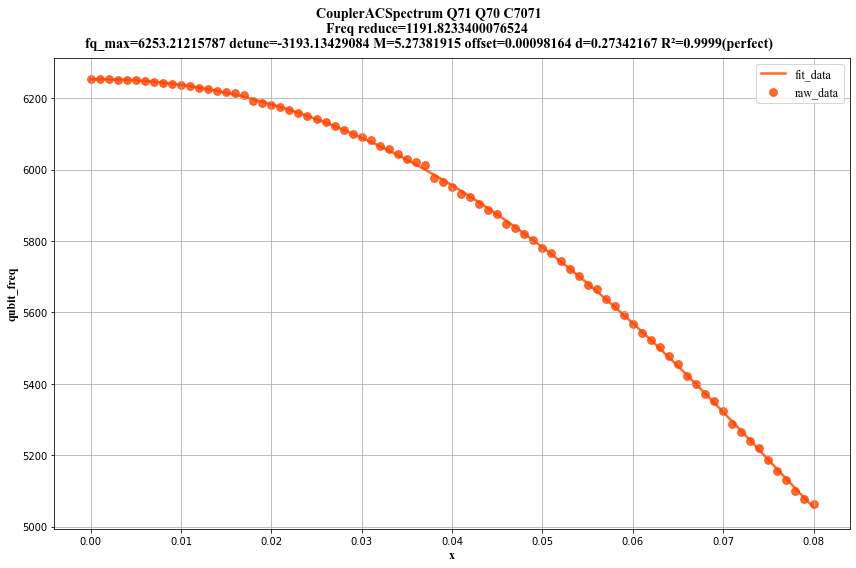

In [32]:
ACS_exp.analysis.drawer.figure

#### 更新AC谱参数

In [14]:
from pyQCat.invoker import DataCenter
ACS_paras = ACS_exp.analysis.show_results()['value']
ACS_exp_quality = ACS_exp.analysis.quality.descriptor

if ACS_exp_quality == Quality.perfect:
    db = DataCenter()
    filename = 'character.json'
    data = db.query_config(filename)['data'][0]['json']
    data[coupler_name]['frequency_zamp_fitting'] = ACS_paras  # z_delay
    db.update_single_config(filename, data)
    
    coupler.ac_spectrum.standard = ACS_paras
    coupler.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-06 01:45:06 |  UPDATE  | Save c7071 to data service success.


In [23]:
coupler.ac_spectrum.standard

[6255.00802238, -3566.40556501, 5.47613677, 0.00228553, 0.23620453]

In [26]:
freq2amp_formula(4800,*coupler.ac_spectrum.standard)

nan

In [37]:
amp2freq_formula(0.146,*coupler.ac_spectrum.standard)

5968.025110931763

In [4]:
amp2freq_formula(0.025,*[6255.00802238, -3566.40556501, 5.47613677, 0.00228553, 0.23620453])

6157.779387029901

### XYZtiming

2022-11-30 17:19:06 |   EXP    | CouplerXYZTiming register success, id 6387200a1bbd1507a6807b24
2022-11-30 17:19:06 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerXYZTiming\q70q71c7071\2022-11-30\17.18.50\


<IPython.core.display.Javascript object>


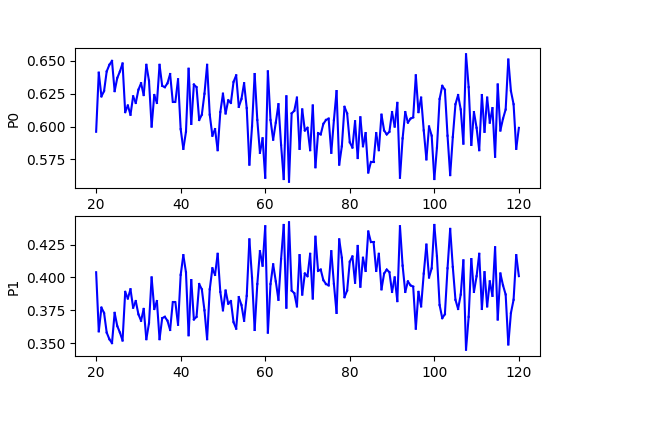

  0%|          | 0/161 [00:00<?, ?it/s]

2022-11-30 17:20:55 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |    quality     | 
----------------------------------------------------
|  fr  |  Delay   | 85.625 |  ns  | R²=0.4285(bad) | 
2022-11-30 17:20:55 |   INFO   | Coupler(bit=7071, driveQ71, probeQ70) XYZTiming, delay offset: -35.625
2022-11-30 17:20:55 |   INFO   | The XY line comes after the Z line，so add Z line delay 35.625


-35.625

In [13]:
xyz_exp = CouplerXYZTiming.from_experiment_context(context)
xyz_exp.set_experiment_options(
    delay_list = qarange(20, 120, 0.625),
    z_amp = 0.05,

#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)

xyz_exp.run()






#### 查询实验结果

In [53]:
pd.DataFrame(xyz_exp.analysis.show_results())

name  value unit extra             quality
0  Delay   85.0   ns    {}  R²=0.9893(perfect)

#### 查询实验结果图

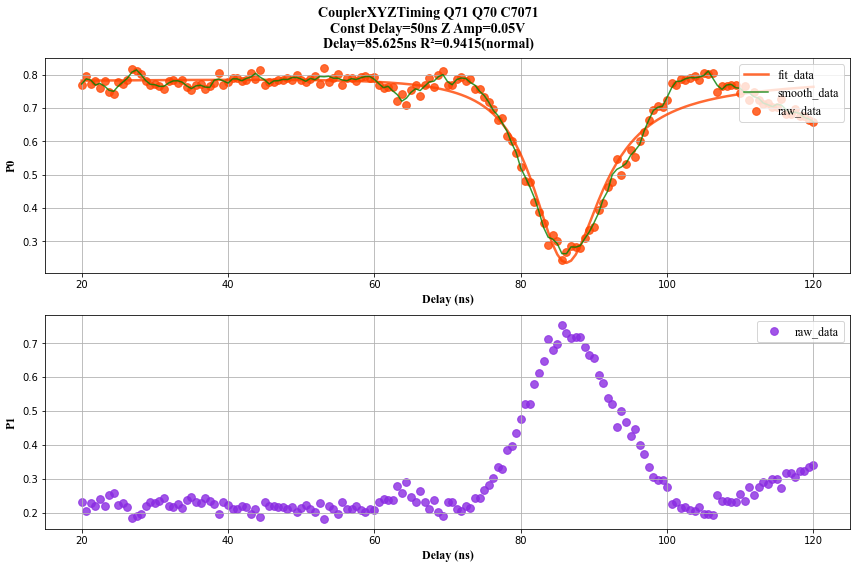

In [17]:
xyz_exp.analysis.drawer.figure

In [10]:
xyz_exp.analysis.results.fr.value

85.625

In [16]:
xyz_exp_quality

'normal'

#### 更新比特参数

In [18]:
from pyQCat.invoker import DataCenter

xyz_exp_quality = xyz_exp.analysis.quality.descriptor
Delay = xyz_exp.analysis.results.fr.value - xyz_exp.experiment_options.z_amp*1e3
if xyz_exp_quality == Quality.normal:
    db = DataCenter()
    filename = 'character.json'
    data = db.query_config(filename)['data'][0]['json']
    data[coupler_name]['hardware_offset'][1] = Delay  # z_delay
    db.update_single_config(filename, data)
else:
    pyqlog.info(f'Experiment results bad, please check!')

### AC串扰

#### 单次

In [59]:
acc1 = CouplerACCrosstalkOnce.from_experiment_context(context)
acc1.set_experiment_options(
#     ac_prepare_time=5000,
    after_delay=1000,
    tq_name='c7071',
    bq_name='q71',
    tq_ac_list=qarange(-0.008, 0.008, 0.0002),
    bq_ac=0.5,
    ac_buffer=8000,
    is_dynamic=1,
#     simulator_data_path='../data/ACCrosstalkOnce/'
)

acc1.run()

ValueError: Context no find c7071, q71

#### ac串扰

2022-11-30 17:13:53 |   EXP    | CouplerACCrosstalkOnce register success, id 63871ed11bbd1507a6807a3f
2022-11-30 17:13:53 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACCrosstalkFixF\q70q71c7071\2022-11-30\17.13.42\CouplerACCrosstalkOnce\17-13-42-bq_ac=0.0\


<IPython.core.display.Javascript object>


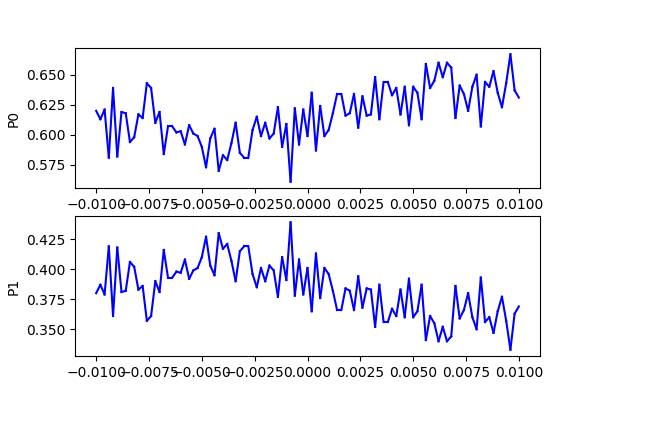

  0%|          | 0/101 [00:00<?, ?it/s]

2022-11-30 17:15:02 |  RESULT  | Experiment results as follow:
| name | describe |    value    | unit |       quality       | 
--------------------------------------------------------------
|  b   | best_ac  | -0.00390367 |  V   | R²=0.5423(abnormal) | 
2022-11-30 17:15:12 |   EXP    | CouplerACCrosstalkOnce register success, id 63871f201bbd1507a6807a78
2022-11-30 17:15:12 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACCrosstalkFixF\q70q71c7071\2022-11-30\17.13.42\CouplerACCrosstalkOnce\17-15-02-bq_ac=0.002\


<IPython.core.display.Javascript object>


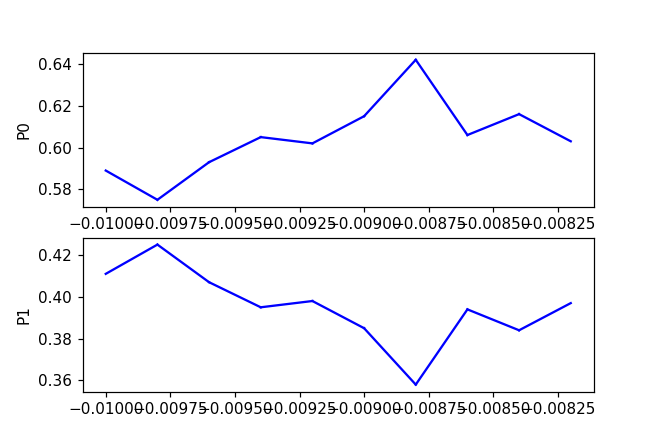

  0%|          | 0/101 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:

tq = 'c7071'
bq = 'q70'

bq_ac_list = qarange(0.00, 0.05, 0.002)
# bq_ac_list.extend(qarange(0.071, 0.08, 0.001))

acc = CouplerACCrosstalkFixF.from_experiment_context(context)

acc.set_experiment_options(
    drive_freq=context.coupler.drive_freq,
    tq_name=tq,
    bq_name=bq,
    bq_ac_list=bq_ac_list,
    ac_buffer=0,
#     after_delay=0,
    init_tq_ac_center=[0]*3,
    init_tq_scan_range=0.01,
    init_tq_scan_gap=0.0002,
    # simulator_data_path=r'E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ACCrosstalkFixF\q71c7071\2022-11-26\22.47.33\ACCrosstalkOnce/'
)
acc.set_analysis_options(fit_type='anal')

acc.child_experiment.set_experiment_options(is_dynamic=1)

acc.run()

In [14]:

tq = 'c7071'
bq = 'q71'

bq_ac_list = qarange(-0.5, 0.5, 0.02)
# bq_ac_list.extend(qarange(0.071, 0.08, 0.001))

acc = CouplerACCrosstalkFixF.from_experiment_context(context)

acc.set_experiment_options(
    drive_freq=context.coupler.drive_freq,
    tq_name=tq,
    bq_name=bq,
    bq_ac_list=bq_ac_list,
#     ac_buffer=1000,
    after_delay=1000,
    init_tq_ac_center=[0.]*3,
    init_tq_scan_range=0.005,
    init_tq_scan_gap=0.0002,
    # simulator_data_path=r'E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\ACCrosstalkFixF\q71c7071\2022-11-26\22.47.33\ACCrosstalkOnce/'
)
acc.set_analysis_options(fit_type='anal')

acc.child_experiment.set_experiment_options(is_dynamic=0,ac_prepare_time=5000)

acc.run()

2022-11-30 21:43:14 |   EXP    | CouplerACCrosstalkOnce register success, id 63875df2859261bf836d35a2
2022-11-30 21:43:14 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\CouplerACCrosstalkFixF\q70q71c7071\2022-11-30\21.43.07\CouplerACCrosstalkOnce\21-43-07-bq_ac=-0.5\


  0%|          | 0/51 [00:00<?, ?it/s]

KeyboardInterrupt: 